In [248]:
library(ggplot2)

In [249]:
install.packages("plotly")

also installing the dependency ‘ggplot2’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [250]:
library(plotly)

In [251]:
error_codes <- read.csv("/Users/Jake/Google Drive/renewablesAIProject/CBM-The-hydes/The hydes errors filtered.csv")

In [252]:
#Error codes for inverter modules
head(error_codes)

X,datetime,Inverter.module.1.01_error.log,Inverter.module.1.02_error.log,Inverter.module.1.03_error.log,Inverter.module.1.04_error.log,Inverter.module.1.05_error.log,Inverter.module.1.06_error.log,Inverter.module.1.07_error.log,Inverter.module.1.08_error.log,⋯,Inverter.module.6.01_error.log,Inverter.module.6.02_error.log,Inverter.module.6.03_error.log,Inverter.module.6.04_error.log,Inverter.module.6.05_error.log,Inverter.module.6.06_error.log,Inverter.module.6.07_error.log,Inverter.module.6.08_error.log,Inverter.module.6.09_error.log,Inverter.module.6.10_error.log
30,2016-10-02 07:30:31,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
32,2016-10-02 08:44:16,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
34,2016-10-02 11:48:01,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
78,2016-10-05 11:38:46,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
80,2016-10-05 12:47:54,19,19,19,19,19,19,19,19,⋯,0,0,0,0,0,0,0,0,0,0
82,2016-10-05 15:39:46,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [253]:
#Primary SCADA data, altered to remove the first 4 rows detailing max, mean and min of each variable
scada <- read.csv("/Users/Jake/Google Drive/renewablesAIProject/CBM-The-hydes/SCADAdataModified.csv")
scada <- scada[,-1]
head(scada)

datetime,WS_Ambient_temperature,WS_Barometric_Pressure,WS_Precipitation,WS_Relative_Humidity,WS_Wind_Direction,WS_Wind_Speed,String_1.01.01_Module_Temperature,String_5.01.01_Module.Temperature,Inv_1_Apparent_Power_Inv_AC,⋯,Inv_6_String_level_availability,Inv_6_Voltage_Inv_DC,Inv_6_Voltage_L1_Inv_AC,Inv_6_Voltage_L2_Inv_AC,Inv_6_Voltage_L3_Inv_AC,Inv_Block_1_Array_capture_losses__daily_,Inv_Block_1_BOS_losses__daily_,Inv_Block_1_Energy_Inv_Block_DC__daily_,Inv_Block_1_Energy_Inv_Block_DC__total_,Inv_Block_1_Energy_yield__daily_
01/10/2016 00:00,8.991664,997.7833,0,95.31669,186.5384,1.635001,3.584099,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01/10/2016 00:15,8.878330,997.6515,0,96.27668,181.2850,1.581667,3.445911,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01/10/2016 00:30,8.816669,997.5633,0,96.69167,184.4834,1.585000,3.474998,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01/10/2016 00:45,8.781671,997.4179,0,96.65331,179.3718,1.698333,3.403377,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,6003500,NA
01/10/2016 01:00,8.748328,997.2102,0,97.24501,178.9933,1.785000,3.275585,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
01/10/2016 01:15,8.956666,997.0320,0,97.40164,187.0617,1.620000,3.833485,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [254]:
#Convert scada datetime variable into POSIXct form
scada$datetime <-as.POSIXct(scada$datetime,format= "%d/%m/%Y%H:%M")

In [255]:
library(xts)

In [256]:
# New variable containing all the operational hours lost for each inverter
non_operational_hours_all_new <- data.frame(scada$datetime, scada$Inv_1_Non_operational_hours, scada$Inv_2_Non_operational_hours, scada$Inv_3_Non_operational_hours, scada$Inv_4_Non_operational_hours, scada$Inv_5_Non_operational_hours, scada$Inv_6_Non_operational_hours)

In [257]:
head(non_operational_hours_all_new)

scada.datetime,scada.Inv_1_Non_operational_hours,scada.Inv_2_Non_operational_hours,scada.Inv_3_Non_operational_hours,scada.Inv_4_Non_operational_hours,scada.Inv_5_Non_operational_hours,scada.Inv_6_Non_operational_hours
2016-10-01 00:00:00,NA,NA,NA,NA,NA,NA
2016-10-01 00:15:00,NA,NA,NA,NA,NA,NA
2016-10-01 00:30:00,NA,NA,NA,NA,NA,NA
2016-10-01 00:45:00,NA,NA,NA,NA,NA,NA
2016-10-01 01:00:00,NA,NA,NA,NA,NA,NA
2016-10-01 01:15:00,NA,NA,NA,NA,NA,NA


In [258]:
# Create XTS object from non operational hours. Stack the inverter numbers so that they can be plotted together.
# Rename the variables
# xts wasn't really necessary..
non_operational_hours_all_xts <- xts(non_operational_hours_all_new[-1], non_operational_hours_all_new$scada.datetime)

temp <- data.frame(index(non_operational_hours_all_xts), stack(as.data.frame(coredata(non_operational_hours_all_xts))))

names(temp)[1] <- "DateTime"
names(temp)[2] <- "HoursLost"
names(temp)[3] <- "InverterNumber"

### Plot of Non operational Hours by inverter over time

**Some Inverter points are hiding behind others**

**Useful for clearly showing the which inverters have been non operational at what time. If the Non-operational hours are indicative of failures in the inverter, will be an important variable to consider**

**Note that Non-operational hours do not revert back to 0 as soon as they are operating again, rather they stay at the peak they reached unntil 17:15 of that day**

To do: Check to what degree non operational hours are indicative of failures (or if just down for maintenance ect.)

Warning message:
“Removed 227049 rows containing missing values (geom_point).”

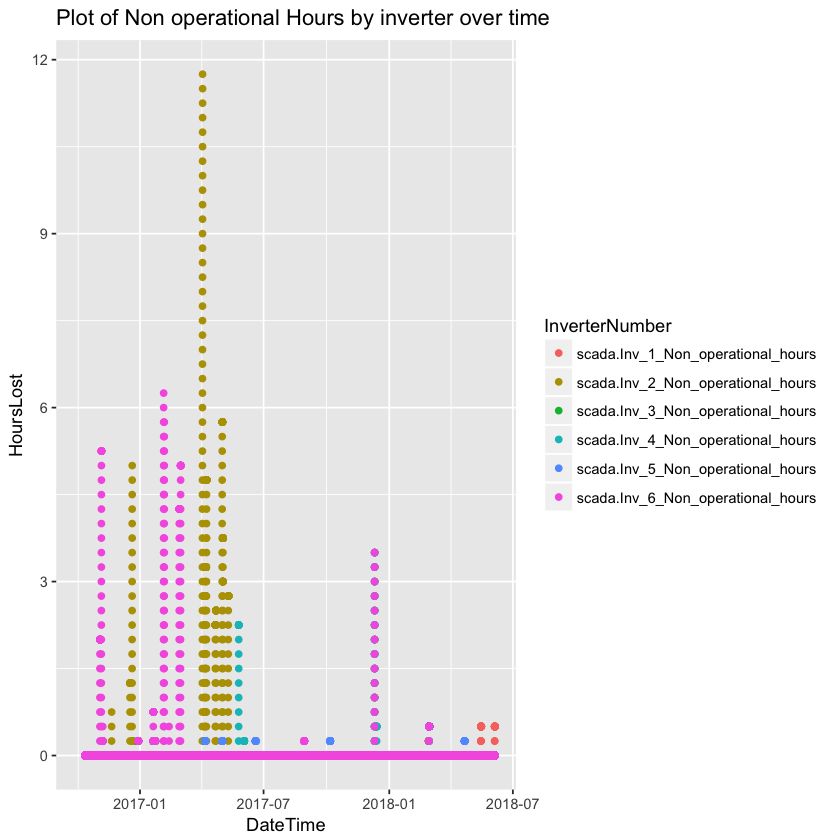

In [259]:

library(ggplot2) #Plotting 
ggplot(temp, aes(DateTime, HoursLost, color=InverterNumber)) + geom_point() +ggtitle("Plot of Non operational Hours by inverter over time") 

### Next plot Error codes occuring in different modules
**Useful to show clearly the prevelance of different error flags occuring in inverter modules**

In [260]:
#Stack error codes and convert the error_code to factor 
error_codes_stacked <- data.frame(error_codes$datetime, stack(as.data.frame(error_codes[-1])))
names(error_codes_stacked)[1] <- "datetime"
names(error_codes_stacked)[2] <- "ErrorCode"
names(error_codes_stacked)[3] <- "Inv_Module"
error_codes_stacked$ErrorCode <- as.factor(error_codes_stacked$ErrorCode)
error_codes_stacked[error_codes_stacked ==0] <- NA
head(error_codes_stacked)

Warning message in stack.data.frame(as.data.frame(error_codes[-1])):
“non-vector columns will be ignored”

datetime,ErrorCode,Inv_Module
2016-10-02 07:30:31,NA,Inverter.module.1.01_error.log
2016-10-02 08:44:16,NA,Inverter.module.1.01_error.log
2016-10-02 11:48:01,NA,Inverter.module.1.01_error.log
2016-10-05 11:38:46,NA,Inverter.module.1.01_error.log
2016-10-05 12:47:54,19,Inverter.module.1.01_error.log
2016-10-05 15:39:46,NA,Inverter.module.1.01_error.log


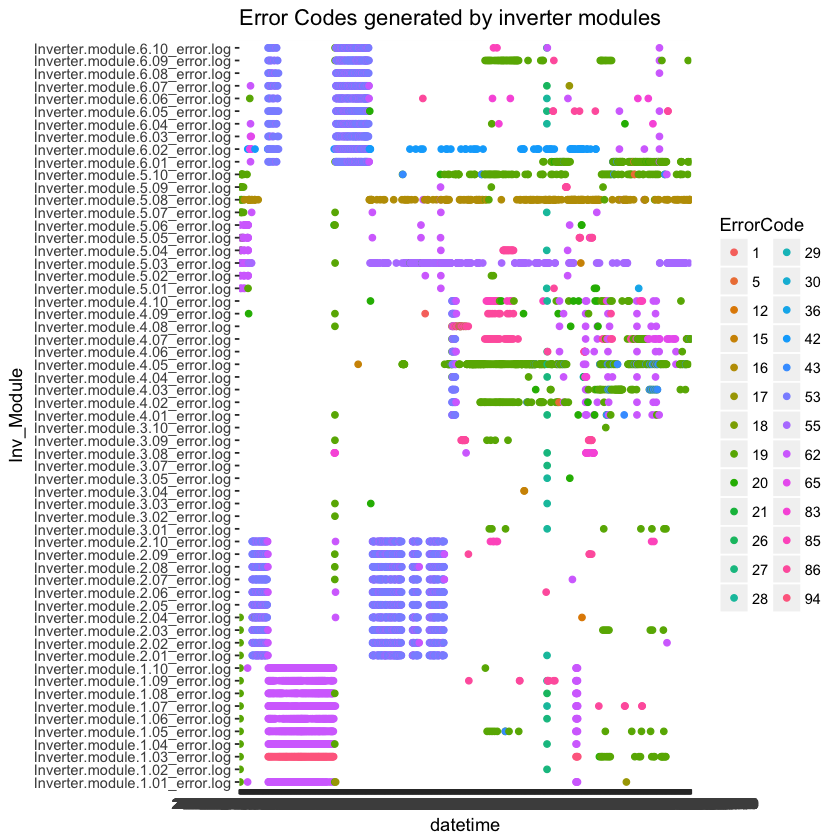

In [261]:
ggplot(na.omit(error_codes_stacked), aes(datetime, Inv_Module, color=ErrorCode)) + geom_point() + ggtitle("Error Codes generated by inverter modules")
#dates not showing in Jupyter, get image from RStudio if necessary

### Frequencies of different error codes
**For determining which are worth investigating further**

In [262]:
error_table <- table(error_codes_stacked$ErrorCode)                    
err_table <- as.data.frame(error_table[-1])  
head(err_table)

Var1,Freq
1,1
5,3
12,2
15,4
16,283
17,3


### Bar Plot shows error codes 19, 53 and 62 being by far the most prevelant
**Error Code 19: Starting Voltage is too low. Grid current has reached dangerous level, its level is 150% of the inverter rated current. AC power is stronger than DC power**

**Error Code 53: The earth leakage current device has detected an anomaly** 

**Error Code 62: Optic Fibre Communication Fault** 

Error codes 16 and 55 also have fairly high prevelance compared to other Error Codes

Error Code 16: IGBT, Gate Drive, cables or Control Board or Power Board is damaged. Power semi-conductor internal protection has been activated

Error Code 55: A fault has been detected in the AC main contactor. Integrated switch doesn't work 

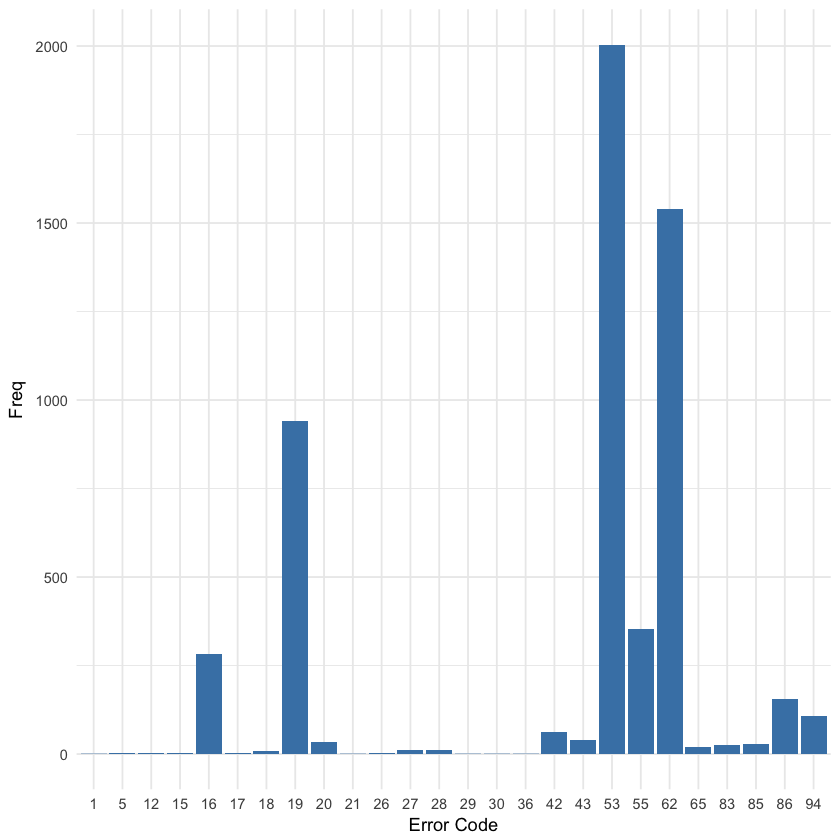

In [263]:
ggplot(err_table, aes(Var1, Freq)) + geom_bar(stat="identity", fill="steelblue") + theme_minimal() +xlab("Error Code")

Error Code 94 doesn't exist in the producer manual however...

## Using Twitters anomalyDetection Package to explore variables of interest

**Finding anomalous results in certain variables, particularly around time that error code flags or non operational hours occur would be a strong indication that the variable would be worth including in a model**

In [264]:
install.packages("devtools")
devtools::install_github("twitter/AnomalyDetection")
library(AnomalyDetection)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Skipping install of 'AnomalyDetection' from a github remote, the SHA1 (1f5deaa1) has not changed since last install.
  Use `force = TRUE` to force installation


In [265]:
#Function to automate the production of anomalyDetection objects and plots
make_anomaly_object <- function(variable, anoms, ylab_string, title_string) {
  xts_variable <- xts(variable, scada$datetime)
  xts_variable <- na.approx(xts_variable)
  new_variable <- data.frame(index(xts_variable), as.data.frame(coredata(xts_variable)))
  Variable_anom <- AnomalyDetectionTs(new_variable, max_anoms=anoms, direction='both', plot=TRUE, ylabel = ylab_string, xlabel = "DateTime", title = title_string)
  return(Variable_anom)
}

$anoms
             timestamp    anoms
1  2017-06-06 11:30:00 21.75918
2  2017-07-10 13:00:00 38.97332
3  2017-07-10 13:15:00 72.77327
4  2017-07-19 02:45:00 31.74667
5  2017-08-05 12:30:00 32.24001
6  2017-08-08 12:30:00 65.28003
7  2017-09-09 15:15:00 31.00667
8  2018-01-02 23:30:00 35.80800
9  2018-03-30 14:30:00 26.40000
10 2018-03-30 14:45:00 24.10909
11 2018-05-02 12:45:00 21.93333

$plot


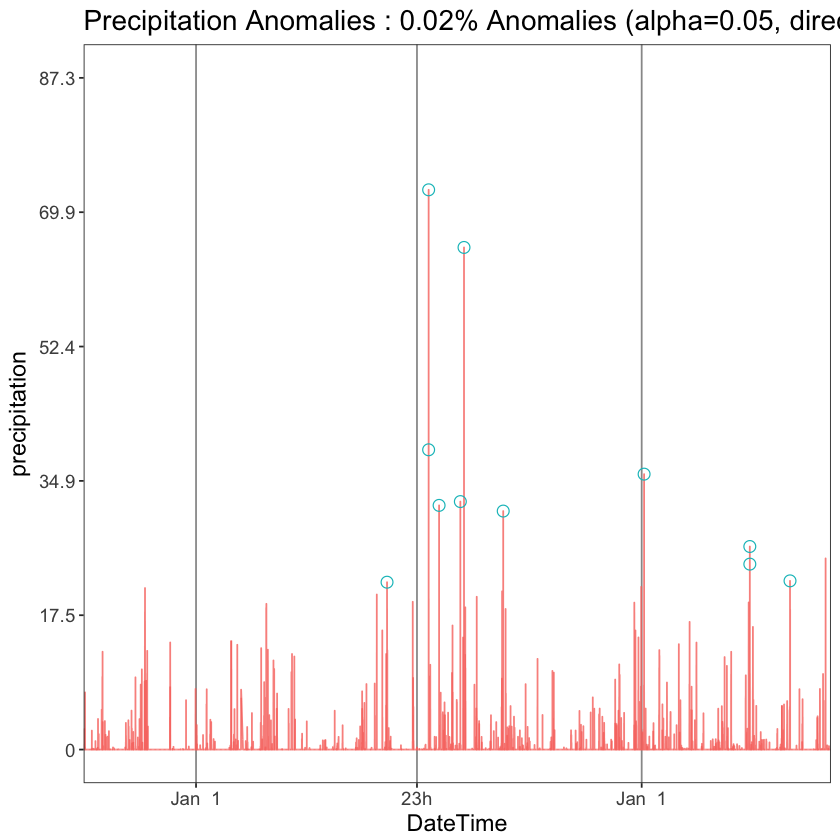

In [266]:
#example variable of precipitation for anomaly detection 
make_anomaly_object(scada$WS_Precipitation, 0.0002, "precipitation", "Precipitation Anomalies")

### Efficiency is likely to be a relevant factor to predicting maintenance issues. As such efficiency anomaly plots for all inverters are produced below. This will help gain an understanding of when efficiency drops occur

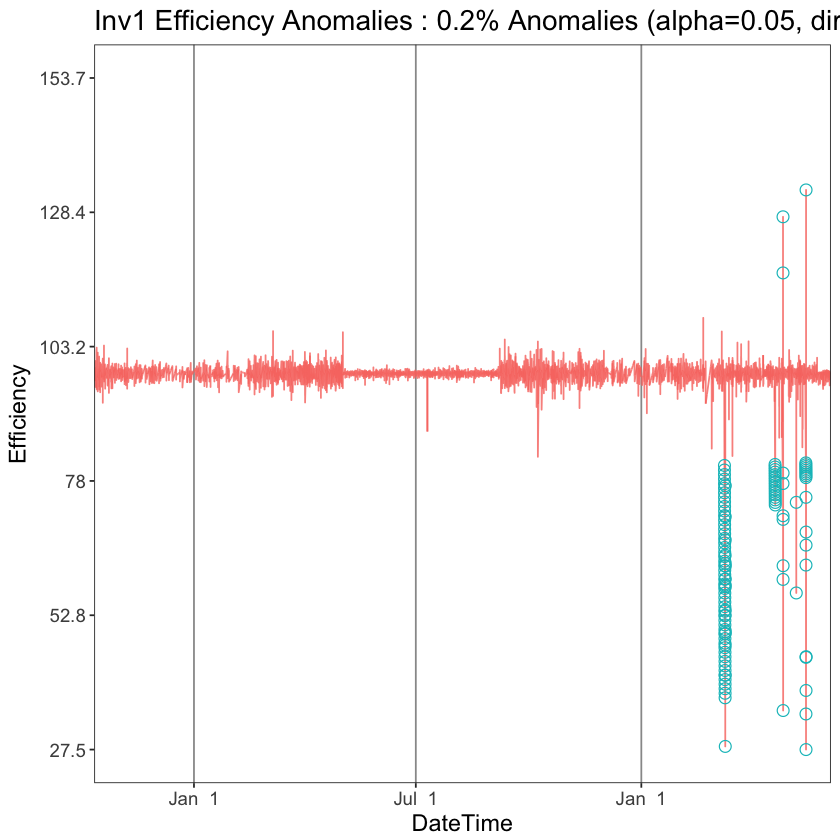

In [267]:
i1_eff_anoms <- make_anomaly_object(scada$Inv_1_Inv_efficiency, 0.002, "Efficiency", "Inv1 Efficiency Anomalies")
i1_eff_anoms$plot

**There seems to be a correlation here between efficiency losse, non-operational hours and the error code 19 flags in some of the inverter 1 modules**

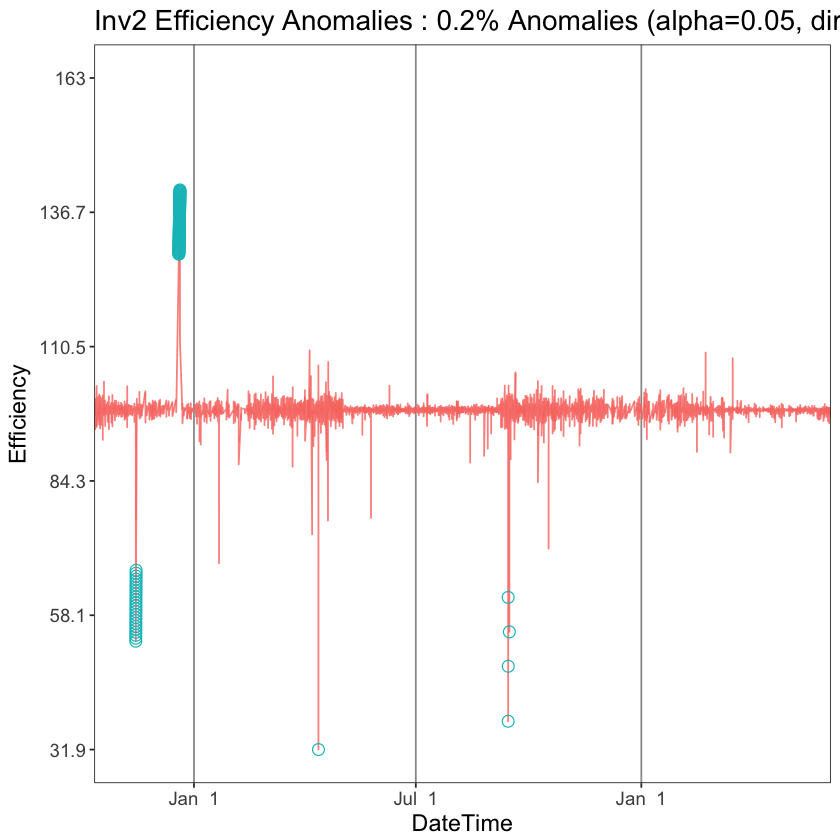

In [268]:
i2_mean_eff_anoms <- make_anomaly_object(scada$Inv_2_Inv_efficiency, 0.002, "Efficiency", "Inv2 Efficiency Anomalies")
i2_mean_eff_anoms$plot

**Possible correlation between efficiency anoms and Error Code 55 flags**

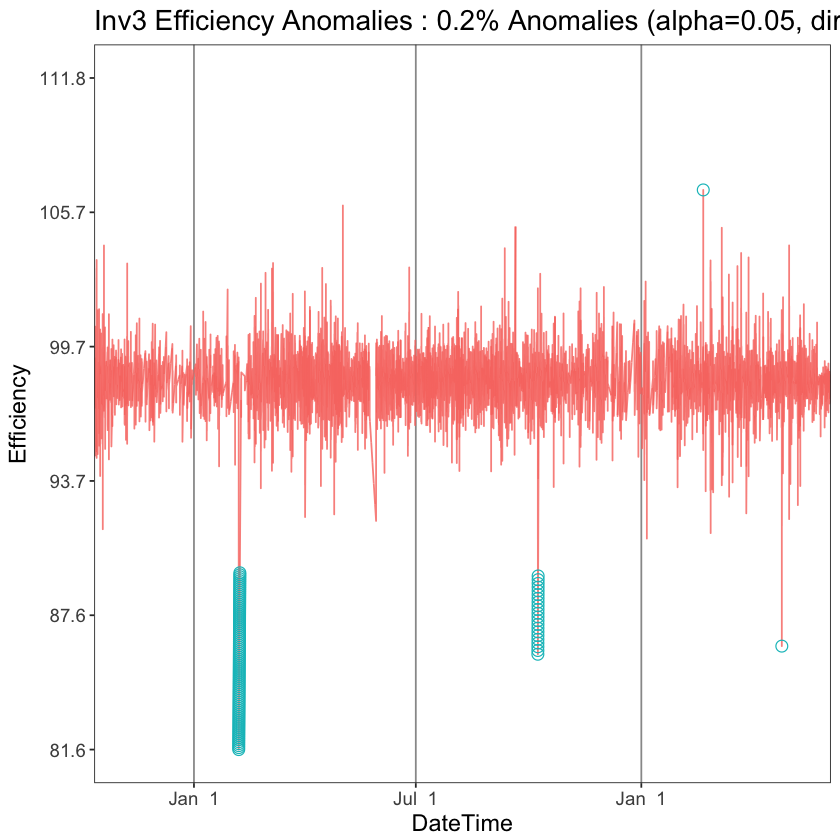

In [269]:
i3_mean_eff_anoms <- make_anomaly_object(scada$Inv_3_Inv_efficiency, 0.002, "Efficiency", "Inv3 Efficiency Anomalies")
i3_mean_eff_anoms$plot

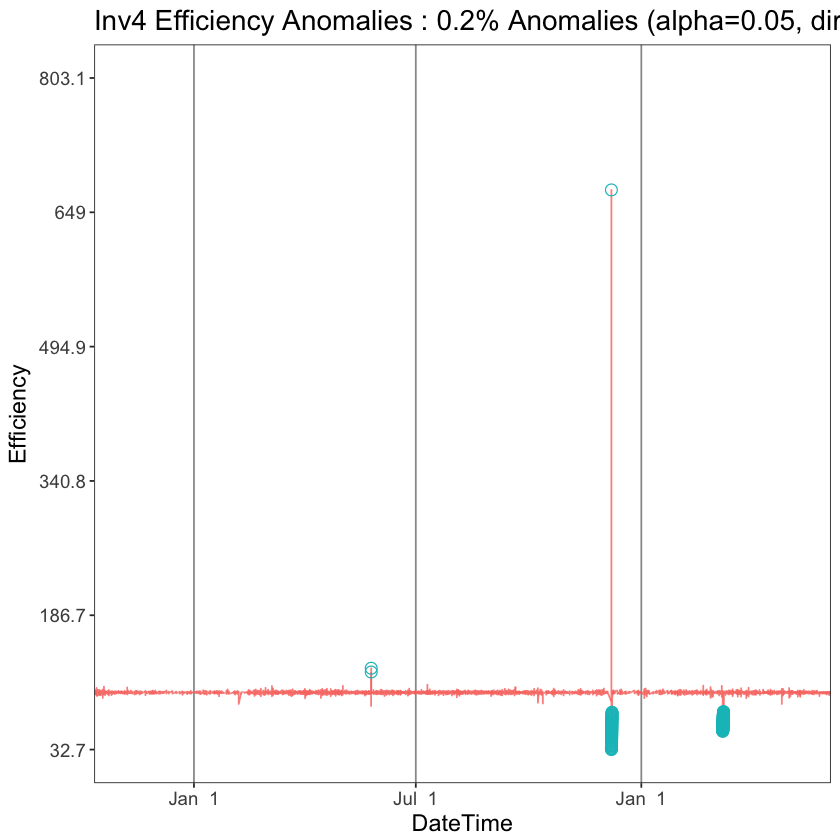

In [270]:
i4_mean_eff_anoms <- make_anomaly_object(scada$Inv_4_Inv_efficiency, 0.002, "Efficiency", "Inv4 Efficiency Anomalies")
i4_mean_eff_anoms$plot

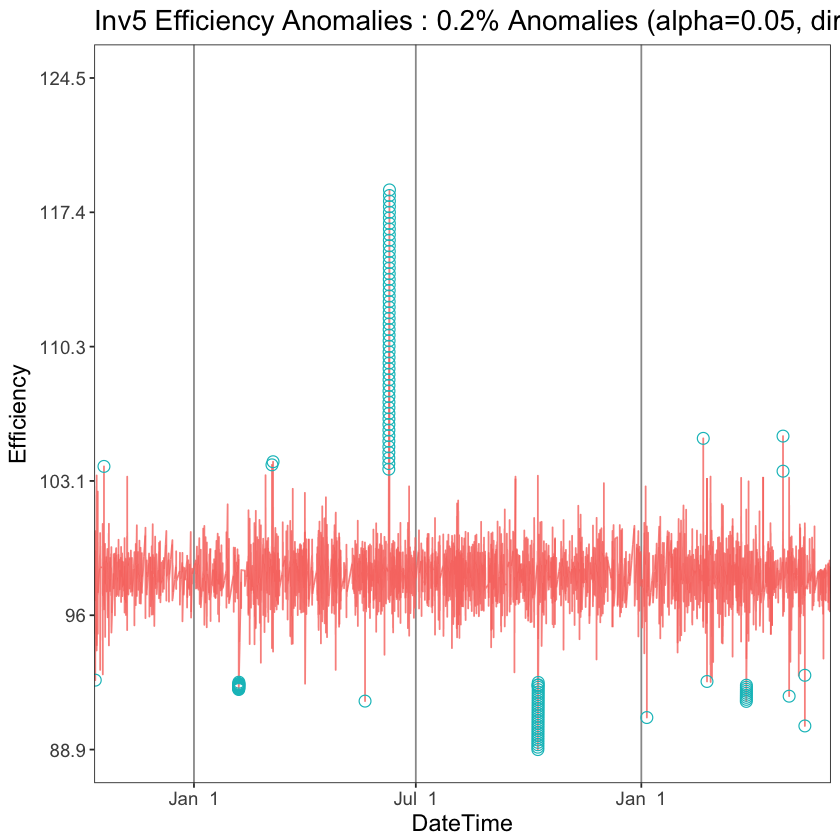

In [271]:
i5_mean_eff_anoms <- make_anomaly_object(scada$Inv_5_Inv_efficiency, 0.002, "Efficiency", "Inv5 Efficiency Anomalies")
i5_mean_eff_anoms$plot

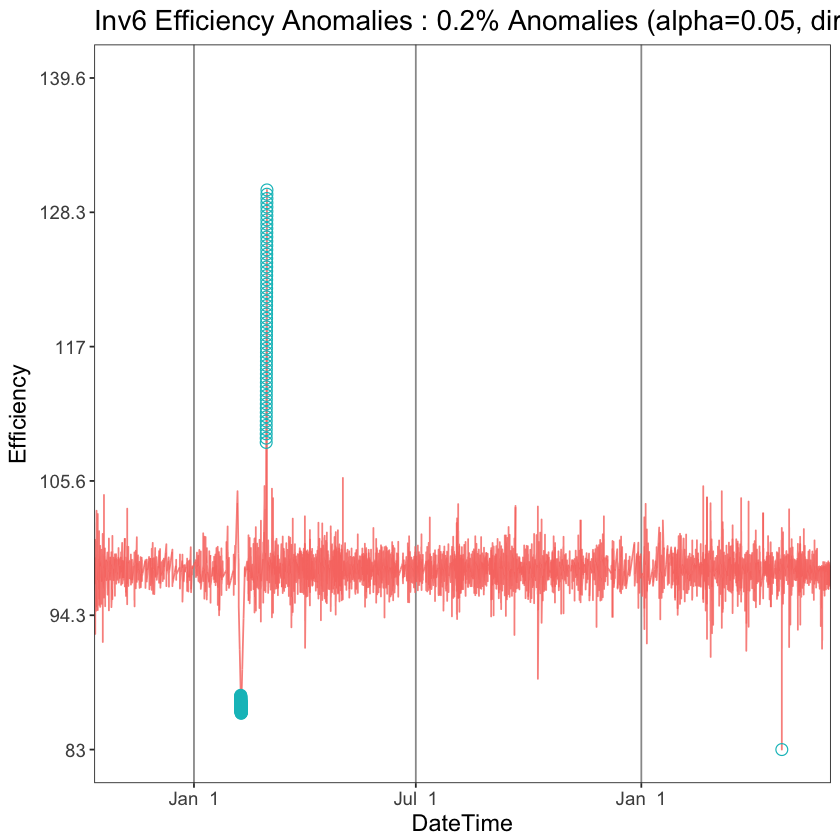

In [272]:
i6_mean_eff_anoms <- make_anomaly_object(scada$Inv_6_Inv_efficiency, 0.002, "Efficiency", "Inv6 Efficiency Anomalies")
i6_mean_eff_anoms$plot

slightly similar to inv2

### Aggregate to produce daily means for scada table
**This will help remove the noise from some of the variables, and will be used later on in the analysis**

In [274]:
scada_xts <- xts(scada[-1], scada$datetime)
scada_daily_means <- period.apply(scada_xts, endpoints(scada_xts, "days"), colMeans, na.rm=TRUE)

**This is then used to produce a correlation table for the daily mean values in the SCADA dataframe**

In [275]:
corr <- cor(scada_daily_means, use="pairwise")
head(corr)

Warning message in cor(scada_daily_means, use = "pairwise"):
“the standard deviation is zero”

,WS_Ambient_temperature,WS_Barometric_Pressure,WS_Precipitation,WS_Relative_Humidity,WS_Wind_Direction,WS_Wind_Speed,String_1.01.01_Module_Temperature,String_5.01.01_Module.Temperature,Inv_1_Apparent_Power_Inv_AC,Inv_1_Array_capture_losses__daily_,⋯,Inv_6_String_level_availability,Inv_6_Voltage_Inv_DC,Inv_6_Voltage_L1_Inv_AC,Inv_6_Voltage_L2_Inv_AC,Inv_6_Voltage_L3_Inv_AC,Inv_Block_1_Array_capture_losses__daily_,Inv_Block_1_BOS_losses__daily_,Inv_Block_1_Energy_Inv_Block_DC__daily_,Inv_Block_1_Energy_Inv_Block_DC__total_,Inv_Block_1_Energy_yield__daily_
WS_Ambient_temperature,1.00000000,0.02168447,-0.034324894,-0.37781961,0.086236229,-0.2283665,0.98062254,0.97383771,0.42192168,0.26880130,⋯,0.15186400,NA,-0.048364215,-0.06162312,-0.04983917,0.232730456,0.49539817,0.55496798,0.11362502,0.55496708
WS_Barometric_Pressure,0.02168447,1.00000000,-0.437824604,-0.07478707,-0.043030616,-0.4214814,0.06703720,0.05770409,0.08205908,0.21117816,⋯,0.03400281,NA,-0.090423002,-0.09098831,-0.08905683,0.215604892,0.12486073,0.13909176,-0.24841621,0.13909299
WS_Precipitation,-0.03432489,-0.43782460,1.000000000,0.25527635,0.008981765,0.1620304,-0.06866703,-0.06257379,-0.14984187,-0.22182965,⋯,0.01289974,NA,0.032037759,0.03360703,0.03215298,-0.216147821,-0.18699707,-0.20739821,0.05643565,-0.20739674
WS_Relative_Humidity,-0.37781961,-0.07478707,0.255276355,1.00000000,-0.052322669,-0.0733573,-0.44799875,-0.45968353,-0.51247586,-0.61190952,⋯,-0.17598717,NA,0.007595795,0.02083704,0.01171816,-0.580848636,-0.66429218,-0.75492094,-0.09873078,-0.75491885
WS_Wind_Direction,0.08623623,-0.04303062,0.008981765,-0.05232267,1.000000000,0.2328335,0.03779526,0.03084966,0.16212621,0.01478994,⋯,0.03911336,NA,0.019138971,0.01907359,0.01946426,0.004923744,0.01443183,-0.00685658,0.05424865,-0.00685821
WS_Wind_Speed,-0.22836652,-0.42148139,0.162030423,-0.07335730,0.232833450,1.0000000,-0.28360594,-0.28266946,-0.09299040,-0.19916732,⋯,0.01650921,NA,0.042983067,0.04367301,0.03960688,-0.201576759,-0.21600647,-0.23919470,0.05908606,-0.23919897


In [276]:
core_df <- as.data.frame(corr)

In [277]:
head(core_df["Inv_1_Mean_array_efficiency"])

,Inv_1_Mean_array_efficiency
WS_Ambient_temperature,0.26645241
WS_Barometric_Pressure,-0.10099306
WS_Precipitation,0.08998170
WS_Relative_Humidity,0.03210973
WS_Wind_Direction,-0.06805868
WS_Wind_Speed,-0.05060340


## To begin with will focus on Error Code 19
**Definition: Starting Voltage is too low. Grid current has reached dangerous level, its level is 150% of the inverter rated current. AC power is stronger than DC power**

**This has been chosen as there are several variables that seem obvious candidates**

**This is sort of for learning purposes, but some results might be useful later on**

### Firstly produce hourly means from SCADA data, as this level of precision is best the variables we will be investigating. Then produce the hours that an error code 19 was flagged on inverter 1

In [278]:
#scada_xts is same as in r studio, as is scada_hourly_means
scada_hourly_means <- period.apply(scada_xts, endpoints(scada_xts, "hours"), colMeans, na.rm=TRUE)

In [279]:
#Convert scada datetime variable into POSIXct form
error_codes_stacked$datetime <-as.POSIXct(error_codes_stacked$datetime,format= "%Y-%m-%d%H:%M")

In [280]:
#Only Error Code 19
hourly_error_code_19 <- subset(error_codes_stacked, ErrorCode == 19)

In [281]:
head(hourly_error_code_19)

,datetime,ErrorCode,Inv_Module
5,2016-10-05 12:47:00,19,Inverter.module.1.01_error.log
658,2017-01-27 11:41:00,19,Inverter.module.1.01_error.log
3120,2016-10-05 12:47:00,19,Inverter.module.1.02_error.log
6235,2016-10-05 12:47:00,19,Inverter.module.1.03_error.log
8722,2018-04-19 11:45:00,19,Inverter.module.1.03_error.log
8729,2018-04-19 12:20:00,19,Inverter.module.1.03_error.log


In [282]:
hourly_error_code_19<- xts(hourly_error_code_19[-1], hourly_error_code_19$datetime)

In [283]:
hourly_error_code_19 <- align.time(hourly_error_code_19, 60*60)

In [284]:
hourly_error_code_19 <- data.frame(index(hourly_error_code_19), as.data.frame(coredata(hourly_error_code_19)))

In [285]:
#Round date time to nearest hour for all instances of Error Code 19
head(hourly_error_code_19)

index.hourly_error_code_19.,ErrorCode,Inv_Module
2016-10-05 13:00:00,19,Inverter.module.1.01_error.log
2016-10-05 13:00:00,19,Inverter.module.1.02_error.log
2016-10-05 13:00:00,19,Inverter.module.1.03_error.log
2016-10-05 13:00:00,19,Inverter.module.1.04_error.log
2016-10-05 13:00:00,19,Inverter.module.1.05_error.log
2016-10-05 13:00:00,19,Inverter.module.1.06_error.log


In [286]:
#Return all the error code 19s in inverter 1
inv1_err_19 <- subset(hourly_error_code_19, grepl("Inverter.module.1.", hourly_error_code_19$Inv_Module))

In [287]:
names(inv1_err_19)[1] <- "datetime"
head(inv1_err_19)

datetime,ErrorCode,Inv_Module
2016-10-05 13:00:00,19,Inverter.module.1.01_error.log
2016-10-05 13:00:00,19,Inverter.module.1.02_error.log
2016-10-05 13:00:00,19,Inverter.module.1.03_error.log
2016-10-05 13:00:00,19,Inverter.module.1.04_error.log
2016-10-05 13:00:00,19,Inverter.module.1.05_error.log
2016-10-05 13:00:00,19,Inverter.module.1.06_error.log


In [288]:
# Finally produce df containing all hours that have a error code 19 in inverter one (removing duplicate hours, 
#as we only care about inverter 1 as a whole, not individual modules), 
#with an extra column showing 19 so as to be able to easily plot when tables are merged 
temp1 <- distinct(inv1_err_19, datetime)
temp2 <- data.frame(temp1, c(rep('19', 20)))

### Now subselect only the Inverter 1 variables

In [289]:
#Round to nearest hour again, subselect Inveter 1
scada_hourly_means <- align.time(scada_hourly_means, 60*60)
scada_hourly_means_df <-  data.frame(index(scada_hourly_means), as.data.frame(coredata(scada_hourly_means)))
scada_inv1_hourly_mean  <- scada_hourly_means_df[1:49]
#CRUCIAL THAT THIS CELL IS NOT RAN MORE THAN ONCE AFTER scada_daily_means IS CREATED, OTHERWISE IT ROUNDS AWAY AN 
#AN HOUR EACH TIME

In [290]:
#change column to datetime so as to be able to join temp 2 on it
names(scada_inv1_hourly_mean)[names(scada_inv1_hourly_mean)=="index.scada_hourly_means."] <- "datetime"


In [291]:
#merge the inverter 1 error code and SCADA data into a single df, joining on hours where error code 19 is flagged
inv1_19_merge <- merge(x = scada_inv1_hourly_mean, y = temp2, by = "datetime", all = TRUE)

In [292]:
#change added col name to somtehing intelligible
names(inv1_19_merge)[names(inv1_19_merge)=="c.rep..19...20.."] <- "error_code_19"

In [293]:
temp2

datetime,c.rep..19...20..
2016-10-05 13:00:00,19
2017-01-27 12:00:00,19
2017-06-19 13:00:00,19
2017-06-19 14:00:00,19
2017-06-19 15:00:00,19
2017-06-20 14:00:00,19
2017-06-21 15:00:00,19
2018-04-19 12:00:00,19
2018-04-19 13:00:00,19
2018-04-19 14:00:00,19


**From a quick look at temp2, we can see there is a large block of error code 19s between 2018-05-05 to 2018-05-08**

In [294]:
#select mentioned dates (uses roundabout way using XTS, I imagine there is a better method though)
#also convert module temp to numeric (all variables currently factors, should fix that)
xts_inv1_19_merge <- xts(inv1_19_merge[-1], inv1_19_merge$datetime)
subselect <- xts_inv1_19_merge["2018-05-04/2018-05-08"]
subselect <- data.frame(index(subselect), as.data.frame(coredata(subselect)))
names(subselect)[1] <- "datetime"
subselect$Inv_1_Module_Temperature <- as.numeric(levels(subselect$Inv_1_Module_Temperature))[subselect$Inv_1_Module_Temperature]
head(subselect[])

datetime,WS_Ambient_temperature,WS_Barometric_Pressure,WS_Precipitation,WS_Relative_Humidity,WS_Wind_Direction,WS_Wind_Speed,String_1.01.01_Module_Temperature,String_5.01.01_Module.Temperature,Inv_1_Apparent_Power_Inv_AC,⋯,Inv_1_Raw_PR,Inv_1_Reactive_Power_Inv_AC,Inv_1_Reference_yield__daily_,Inv_1_Specific_power,Inv_1_String_level_availability,Inv_1_Voltage_Inv_DC,Inv_1_Voltage_L1_Inv_AC,Inv_1_Voltage_L2_Inv_AC,Inv_1_Voltage_L3_Inv_AC,error_code_19
2018-05-04 00:00:00,10.607499600,1009.7235,0.000000000,83.19750,195.88251,1.23666677,4.582214350,5.043673050,NA,⋯,NA,NA,1.532398600,0.000000000,NA,0,205.0446,204.9321,204.3800,NA
2018-05-04 01:00:00,9.512501500,1009.7826,0.000000000,86.78917,192.02834,1.43500017,2.232432350,2.402114850,NA,⋯,NA,NA,0.000000000,0.000000000,NA,0,204.4357,204.4782,204.0229,NA
2018-05-04 02:00:00,8.795000325,1010.0282,0.000000000,88.43666,188.04418,1.61416637,1.779818575,1.886105575,NA,⋯,NA,NA,0.000000000,0.000000000,NA,0,204.4609,204.5284,203.9888,NA
2018-05-04 03:00:00,8.535834825,1010.2998,0.000000000,89.52249,184.59333,1.46166638,2.451467500,2.943205825,NA,⋯,NA,NA,0.000000000,0.000000000,NA,0,205.1966,205.1713,204.5587,NA
2018-05-04 04:00:00,8.553334950,1010.2760,0.000000000,90.38668,200.80084,1.22583337,2.898693100,3.688120825,NA,⋯,NA,NA,0.000000000,0.000000000,NA,0,205.3333,205.3917,204.6833,NA
2018-05-04 05:00:00,8.731664900,1010.4639,0.000000000,90.40417,186.64335,0.70666652,3.053903575,3.919768375,59.606485,⋯,NA,-59.85426,0.000279050,0.001301325,NA,0,204.4062,204.4238,203.7792,NA


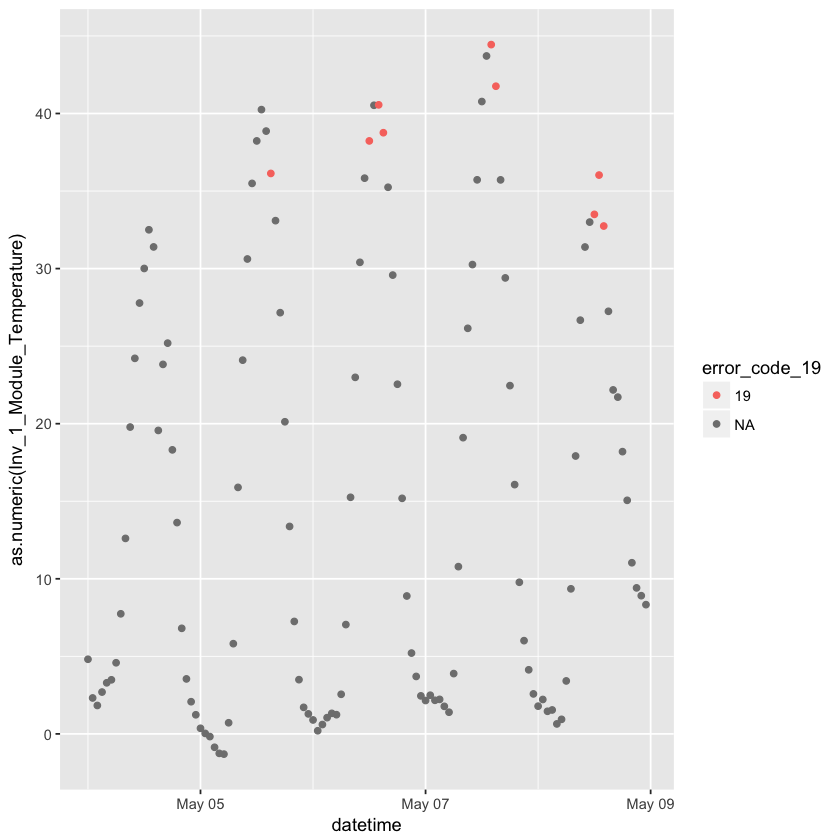

In [295]:
#plot
ggplot(data=subselect, aes(datetime, as.numeric(Inv_1_Module_Temperature), color=error_code_19)) + geom_point()

**From the graph above we can see that when module temperatures spike, error code 19 tends to be triggered. Strangley, although there is are anomalous data points on the yearly plot for inv1_module_temp, anomalyDetection() does not pick anything up.**

**However it is clear that module temperature strongly determines an error code 19 flag **

In [296]:
#some weirdness going on with col 32 nominal power that wasnt a problem in R Studio. Seems find like this... 
for (i in 2:31){ 
    subselect[,i] <- as.numeric(levels(subselect[,i]))[subselect[,i]]
}
for (i in 33:49){ 
    subselect[,i] <- as.numeric(levels(subselect[,i]))[subselect[,i]]
}


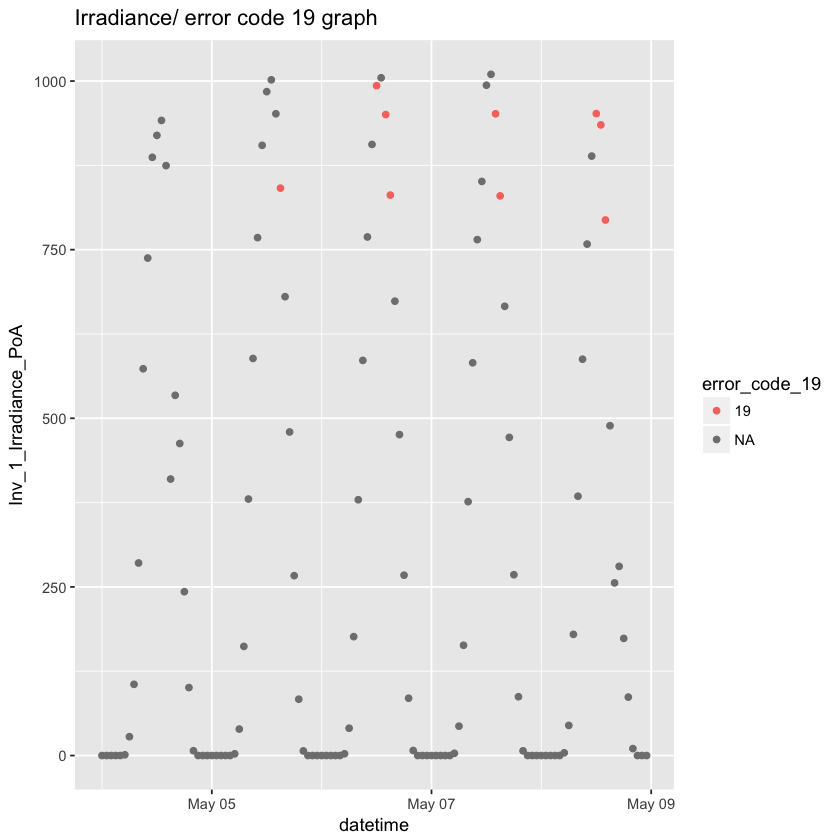

In [297]:
ggplot(subselect, aes(datetime, Inv_1_Irradiance_PoA,  color=error_code_19)) + geom_point() + ggtitle("Irradiance/ error code 19 graph")

## To produce a model, we must first combine the data from all inverters so have access to available instances of error code 19

In [298]:
#Produce hourly mean dfs for all inverters
scada_inv2_hourly_means <- scada_hourly_means_df[c(1:9, 50:89)]
scada_inv3_hourly_means <- scada_hourly_means_df[c(1:9, 90:129)]
scada_inv4_hourly_means <- scada_hourly_means_df[c(1:9, 130:169)]
scada_inv5_hourly_means <- scada_hourly_means_df[c(1:9, 170:209)]
scada_inv6_hourly_means <- scada_hourly_means_df[c(1:9, 210:249)]

In [299]:
#Make column names generic
col_names <- c("datetime", "WS_Ambient_temperature", "WS_Barometric_Pressure", "WS_Precipitation", "WS_Relative_Humidity", "WS_Wind_Direction", "WS_Wind_Speed", "String_1.01.01_Module_Temperature", "String_5.01.01_Module.Temperature", "Apparent_Power_Inv_AC", "Array_capture_losses__daily_", "Availability", "BOS_losses__daily_", "Current_Inv_DC", "Current_L1_Inv_AC", "Current_L2_Inv_AC", "Current_L3_Inv_AC", "Energy_Inv_DC__daily_", "Energy_Inv_DC_Measured__total_", "Energy_yield__daily_", "Exported_Energy_Inv_AC__daily_", "Exported_Energy_Inv_AC_Measured__total_", "Energy_Inv_DC__total_", "Exported_Energy_Inv_AC__total_", "Final_yield__daily_", "Frequency_Inv_AC", "Insolation__daily_", "Inv_efficiency","Irradiance_PoA", "Mean_array_efficiency", "Module_Active_Area", "Module_Temperature", "Nominal_Power_DC", "Non_operational_hours", "Power_factor_Inv_AC", "Power_Inv_AC", "Power_Inv_DC", "Power_L1_Inv_AC", "Power_L2_Inv_AC ", "Power_L3_Inv_AC", "Raw_PR", "Reactive_Power_Inv_AC", "Reference_yield__daily_", "Specific_power", "String_level_availability", "Voltage_Inv_DC", "Voltage_L1_Inv_AC", "Voltage_L2_Inv_AC", "Voltage_L3_Inv_AC")
colnames(scada_inv1_hourly_mean) <- col_names
colnames(scada_inv2_hourly_means) <- col_names
colnames(scada_inv3_hourly_means) <- col_names
colnames(scada_inv4_hourly_means) <- col_names
colnames(scada_inv5_hourly_means) <- col_names
colnames(scada_inv6_hourly_means) <- col_names

In [300]:
#Create column denoting to make merging easier later 
scada_inv1_hourly_mean$inverter <- rep(1,nrow(scada_inv1_hourly_mean))
scada_inv2_hourly_means$inverter <- rep(2,nrow(scada_inv2_hourly_means))
scada_inv3_hourly_means$inverter <- rep(3,nrow(scada_inv3_hourly_means))
scada_inv4_hourly_means$inverter <- rep(4,nrow(scada_inv4_hourly_means))
scada_inv5_hourly_means$inverter <- rep(5,nrow(scada_inv5_hourly_means))
scada_inv6_hourly_means$inverter <- rep(6,nrow(scada_inv6_hourly_means))

In [301]:
#Combine inverter data frames
scada_hourly_means_stacked <- rbind(scada_inv1_hourly_mean, scada_inv2_hourly_means, scada_inv3_hourly_means, scada_inv4_hourly_means, scada_inv5_hourly_means, scada_inv6_hourly_means)

### Now manipulate error code 19 in order to merge with the SCADA data

In [302]:
names(hourly_error_code_19)[1] <- "datetime"
hourly_error_code_19$Inv_Module <-   gsub(".*Inverter.module.1.*", "1", hourly_error_code_19$Inv_Module, perl=TRUE)
hourly_error_code_19$Inv_Module <-   gsub(".*Inverter.module.2.*", "2", hourly_error_code_19$Inv_Module, perl=TRUE)
hourly_error_code_19$Inv_Module <-   gsub(".*Inverter.module.3.*", "3", hourly_error_code_19$Inv_Module, perl=TRUE)
hourly_error_code_19$Inv_Module <-   gsub(".*Inverter.module.4.*", "4", hourly_error_code_19$Inv_Module, perl=TRUE)
hourly_error_code_19$Inv_Module <-   gsub(".*Inverter.module.5.*", "5", hourly_error_code_19$Inv_Module, perl=TRUE)
hourly_error_code_19$Inv_Module <-   gsub(".*Inverter.module.6.*", "6", hourly_error_code_19$Inv_Module, perl=TRUE)
head(hourly_error_code_19)
tail(hourly_error_code_19)

datetime,ErrorCode,Inv_Module
2016-10-05 13:00:00,19,1
2016-10-05 13:00:00,19,1
2016-10-05 13:00:00,19,1
2016-10-05 13:00:00,19,1
2016-10-05 13:00:00,19,1
2016-10-05 13:00:00,19,1


,datetime,ErrorCode,Inv_Module
936,2018-06-03 12:00:00,19,4
937,2018-06-03 14:00:00,19,4
938,2018-06-03 14:00:00,19,4
939,2018-06-03 14:00:00,19,4
940,2018-06-03 16:00:00,19,4
941,2018-06-03 16:00:00,19,6


In [303]:
# Get rid of duplicate rows due to modules in same inverter showing same error code
hourly_error_code_19 <- hourly_error_code_19 %>% distinct
#Change col name to match merging data frame
names(hourly_error_code_19)[3] <- "inverter"
#Merge scada and error data
scada_err_19_hourly <- merge(x = scada_hourly_means_stacked, y = hourly_error_code_19, by = c("datetime","inverter"), all = TRUE)
#Arrange by inverter
scada_err_19_hourly <- arrange(scada_err_19_hourly, inverter)
head(scada_err_19_hourly, 3)
tail(scada_err_19_hourly, 3)

datetime,inverter,WS_Ambient_temperature,WS_Barometric_Pressure,WS_Precipitation,WS_Relative_Humidity,WS_Wind_Direction,WS_Wind_Speed,String_1.01.01_Module_Temperature,String_5.01.01_Module.Temperature,⋯,Raw_PR,Reactive_Power_Inv_AC,Reference_yield__daily_,Specific_power,String_level_availability,Voltage_Inv_DC,Voltage_L1_Inv_AC,Voltage_L2_Inv_AC,Voltage_L3_Inv_AC,ErrorCode
2016-10-01 01:00:00,1,8.867084,997.6040,0.00000000,96.23459,182.9196,1.625000,3.477097,NaN,⋯,NaN,NaN,0,0,NaN,0,0,0,0,NA
2016-10-01 02:00:00,1,8.852914,997.0896,0.00000000,97.55125,181.1866,1.832500,4.250479,NaN,⋯,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NA
2016-10-01 03:00:00,1,9.335834,996.4805,0.01166667,98.08961,184.6367,1.462917,6.018138,NaN,⋯,NaN,NaN,0,0,NaN,0,0,0,0,NA


,datetime,inverter,WS_Ambient_temperature,WS_Barometric_Pressure,WS_Precipitation,WS_Relative_Humidity,WS_Wind_Direction,WS_Wind_Speed,String_1.01.01_Module_Temperature,String_5.01.01_Module.Temperature,⋯,Raw_PR,Reactive_Power_Inv_AC,Reference_yield__daily_,Specific_power,String_level_availability,Voltage_Inv_DC,Voltage_L1_Inv_AC,Voltage_L2_Inv_AC,Voltage_L3_Inv_AC,ErrorCode
88126,2018-06-04 22:00:00,6,13.13250,1005.915,0,92.42917,66.26084,1.825834,7.316756,9.553790,⋯,NaN,NaN,1.8444386,0,NaN,0,206.3650,206.4250,204.9959,NA
88127,2018-06-04 23:00:00,6,12.81333,1005.935,0,94.57583,50.46584,1.989167,7.042147,9.239125,⋯,NaN,NaN,1.8444386,0,NaN,0,206.1433,206.0984,204.7504,NA
88128,2018-06-05 00:00:00,6,12.46917,1005.986,0,96.89585,64.34083,2.593333,6.516075,8.700442,⋯,NaN,NaN,0.4611096,0,NaN,0,204.9866,204.7092,203.5809,NA


### Now clean the data of NA values 

In [304]:
# The time period up 2016-10-12 00:00:00 is missing values for a number of key variables. Although there are error 
#code 19 occurances within this period, I decided to omit the data from the first 12 days 
scada_err_19_hourly <- xts(scada_err_19_hourly[-1], scada_err_19_hourly$datetime) 
scada_err_19_hourly <- scada_err_19_hourly["2016-10-12 00:00:00/"]

In [305]:
head(scada_err_19_hourly)

           inverter WS_Ambient_temperature WS_Barometric_Pressure
2016-10-12 "1"      " 8.283332250"         "1010.3782"           
2016-10-12 "2"      " 8.283332250"         "1010.3782"           
2016-10-12 "3"      " 8.283332250"         "1010.3782"           
2016-10-12 "4"      " 8.283332250"         "1010.3782"           
2016-10-12 "5"      " 8.283332250"         "1010.3782"           
2016-10-12 "6"      " 8.283332250"         "1010.3782"           
           WS_Precipitation WS_Relative_Humidity WS_Wind_Direction
2016-10-12 " 0.000000000"   " 93.89665"          " 49.45167"      
2016-10-12 " 0.000000000"   " 93.89665"          " 49.45167"      
2016-10-12 " 0.000000000"   " 93.89665"          " 49.45167"      
2016-10-12 " 0.000000000"   " 93.89665"          " 49.45167"      
2016-10-12 " 0.000000000"   " 93.89665"          " 49.45167"      
2016-10-12 " 0.000000000"   " 93.89665"          " 49.45167"      
           WS_Wind_Speed String_1.01.01_Module_Temperature
2016-10-12

In [306]:
#Show NA count of variables
na_count <-sapply(scada_err_19_hourly, function(y) sum(length(which(is.na(y))))) 
na_count <- data.frame(na_count)
na_count

,na_count
inverter,0
WS_Ambient_temperature,210
WS_Barometric_Pressure,210
WS_Precipitation,210
WS_Relative_Humidity,210
WS_Wind_Direction,210
WS_Wind_Speed,210
String_1.01.01_Module_Temperature,210
String_5.01.01_Module.Temperature,258
Apparent_Power_Inv_AC,49153


In [307]:
# Variables with fewer than 3000 missing entries (~3.5% of total) can be approximated 
for (i in 2:ncol(scada_err_19_hourly)){
  nas <- sum(is.na(scada_err_19_hourly[,i]))
  if (nas < 3000){
    scada_err_19_hourly[,i] <- na.approx(scada_err_19_hourly[,i])
  }
}
na_count <-sapply(scada_err_19_hourly, function(y) sum(length(which(is.na(y))))) 
na_count <- data.frame(na_count)

In [308]:
#This leaves 10 variables that still contain NA values
na_count

,na_count
inverter,0
WS_Ambient_temperature,0
WS_Barometric_Pressure,0
WS_Precipitation,0
WS_Relative_Humidity,0
WS_Wind_Direction,0
WS_Wind_Speed,0
String_1.01.01_Module_Temperature,0
String_5.01.01_Module.Temperature,0
Apparent_Power_Inv_AC,49153


In [309]:
#Although largely absent to begin with, Apparent_Power_Inv_AC NA values can be replaced by 0 as they drop to near 0 
# naturally outside daylight hours
scada_err_19_hourly$Apparent_Power_Inv_AC[is.na(scada_err_19_hourly$Apparent_Power_Inv_AC)] <- 0

In [310]:
#Availability is usually at 100, so the value of the last row can be used to fill NAs for this value
storage.mode(scada_err_19_hourly) <- "numeric"
scada_err_19_hourly[,12] <- na.locf(scada_err_19_hourly[,12])
#First 48 values cannot be interpolated using above method, so give value of 100
scada_err_19_hourly[1:48,12] <- 100

In [311]:
#Current_Inv_DC has no values, so drop
scada_err_19_hourly <- subset(scada_err_19_hourly, select = -c(Current_Inv_DC))

In [312]:
#Non_operational_hours are 0 by default, so replace NAs with 0
scada_err_19_hourly$Non_operational_hours[is.na(scada_err_19_hourly$Non_operational_hours)] <- 0

In [313]:
#String_level_availability is absent from the first half or so of the data with no obvious way 
#to approximate, so will drop
scada_err_19_hourly <- subset(scada_err_19_hourly, select = -c(String_level_availability))

In [314]:
na_count <-sapply(scada_err_19_hourly, function(y) sum(length(which(is.na(y))))) 
na_count <- data.frame(na_count)
na_count

,na_count
inverter,0
WS_Ambient_temperature,0
WS_Barometric_Pressure,0
WS_Precipitation,0
WS_Relative_Humidity,0
WS_Wind_Direction,0
WS_Wind_Speed,0
String_1.01.01_Module_Temperature,0
String_5.01.01_Module.Temperature,0
Apparent_Power_Inv_AC,0


**The remaining variables containing NA values will be converted into rolling 24 hour averages. This is because most of the NA cases occur during non daylight hours, this method allows us to retain the information generarated during day time**

In [315]:
#Convert from xts to df
scada_err_19_hourly <- data.frame(index(scada_err_19_hourly), as.data.frame(coredata(scada_err_19_hourly)))
names(scada_err_19_hourly)[1] <- "datetime"

In [316]:
#Produce rolling 24 hour averages for Inv_efficiency, Mean_array_efficiency, Power_factor_Inv_AC,
#Raw_PR and Reactive_Power_Inv_AC
scada_err_19_hourly <- scada_err_19_hourly %>% 
    arrange(inverter, datetime) %>%
    group_by(inverter) %>%
    mutate(Inv_efficiency_24h_avg = rollapply(Inv_efficiency, width = 24, FUN = mean, align = "right", partial=TRUE, na.rm=TRUE),
          Mean_array_efficiency_24h_avg = rollapply(Mean_array_efficiency, width = 24, FUN = mean, align = "right", partial=TRUE, na.rm=TRUE),
          Power_factor_Inv_AC_24h_avg = rollapply(Power_factor_Inv_AC, width = 24, FUN = mean, align = "right", partial=TRUE, na.rm=TRUE),
          Raw_PR_24h_avg = rollapply(Raw_PR, width = 24, FUN = mean, align = "right", partial=TRUE, na.rm=TRUE),
          Reactive_Power_Inv_AC_24h_avg = rollapply(Reactive_Power_Inv_AC, width = 24, FUN = mean, align = "right", partial=TRUE, na.rm=TRUE)) %>%
    ungroup()

In [317]:
# Drop variables that still contain large numbers of NA values
scada_err_19_hourly <- subset(scada_err_19_hourly, select = -c(Inv_efficiency, Mean_array_efficiency, Power_factor_Inv_AC
                                                              ,Raw_PR, Reactive_Power_Inv_AC, Power_factor_Inv_AC_24h_avg,
                                                              Reactive_Power_Inv_AC_24h_avg))

In [318]:
#Inv_efficiency_24h_avg, Mean_array_efficiency_24h_avg, Raw_PR_24h_avg are probably OK to approximate (maybe come 
#back and use more sophisticated methods however)
scada_err_19_hourly$Raw_PR_24h_avg[is.na(scada_err_19_hourly$Raw_PR_24h_avg)] <- NA
scada_err_19_hourly$Mean_array_efficiency_24h_avg[is.na(scada_err_19_hourly$Mean_array_efficiency_24h_avg)] <- NA
scada_err_19_hourly$Inv_efficiency_24h_avg	[is.na(scada_err_19_hourly$Inv_efficiency_24h_avg)] <- NA

In [319]:
#First values need to present for approximation to work, so use the means of each column
scada_err_19_hourly[1:9,47] <- mean.default(scada_err_19_hourly$Raw_PR_24h_avg, na.rm = TRUE)
scada_err_19_hourly[1:9,46] <- mean.default(scada_err_19_hourly$Mean_array_efficiency_24h_avg, na.rm = TRUE)
scada_err_19_hourly[1:9,45] <- mean.default(scada_err_19_hourly$Inv_efficiency_24h_avg, na.rm = TRUE)

In [320]:
#Approximate
scada_err_19_hourly[,45] <- na.approx(scada_err_19_hourly[45])
scada_err_19_hourly[,46] <- na.approx(scada_err_19_hourly[46])
scada_err_19_hourly[,47] <- na.approx(scada_err_19_hourly[47])

In [321]:
na_count <-sapply(scada_err_19_hourly, function(y) sum(length(which(is.na(y))))) 
na_count <- data.frame(na_count)
na_count

,na_count
datetime,0
inverter,0
WS_Ambient_temperature,0
WS_Barometric_Pressure,0
WS_Precipitation,0
WS_Relative_Humidity,0
WS_Wind_Direction,0
WS_Wind_Speed,0
String_1.01.01_Module_Temperature,0
String_5.01.01_Module.Temperature,0


**Finally before running model, we will add a feature of the cumultaive error codes generated in an inverter in the previous 12 hours**

In [322]:
scada_err_19_hourly$ErrorCode[scada_err_19_hourly$ErrorCode == 19] <- 1
scada_err_19_hourly$ErrorCode[is.na(scada_err_19_hourly$ErrorCode)] <- 0
scada_err_19_hourly <- scada_err_19_hourly %>% group_by(inverter) %>%
    mutate(Rolling_cum_err = rollapplyr(ErrorCode, width = 12, FUN = sum, partial = TRUE)) %>% ungroup()
head(scada_err_19_hourly)

datetime,inverter,WS_Ambient_temperature,WS_Barometric_Pressure,WS_Precipitation,WS_Relative_Humidity,WS_Wind_Direction,WS_Wind_Speed,String_1.01.01_Module_Temperature,String_5.01.01_Module.Temperature,⋯,Specific_power,Voltage_Inv_DC,Voltage_L1_Inv_AC,Voltage_L2_Inv_AC,Voltage_L3_Inv_AC,ErrorCode,Inv_efficiency_24h_avg,Mean_array_efficiency_24h_avg,Raw_PR_24h_avg,Rolling_cum_err
2016-10-12 00:00:00,1,8.283332,1010.378,0.00,93.89665,49.45167,0.9249998,2.609372,4.105759,⋯,0,0,205.7994,205.3213,204.3450,0,98.17276,14.97346,84.00445,0
2016-10-12 01:00:00,1,9.204997,1010.183,0.00,92.96999,51.74834,1.2166668,5.154515,5.744148,⋯,0,0,204.7457,204.5644,203.5870,0,98.17276,14.97346,84.00445,0
2016-10-12 02:00:00,1,10.118335,1010.205,0.01,91.82167,58.21000,1.6533336,5.999016,6.431937,⋯,0,0,204.4780,204.3479,203.3545,0,98.17276,14.97346,84.00445,0
2016-10-12 03:00:00,1,10.028335,1010.028,0.00,93.23332,40.43167,1.3033332,5.785537,6.349063,⋯,0,0,205.0204,204.8822,203.9383,0,98.17276,14.97346,84.00445,0
2016-10-12 04:00:00,1,10.003334,1009.662,0.00,93.34833,32.53666,1.2949999,5.370688,5.892229,⋯,0,0,205.3701,205.2043,204.2848,0,98.17276,14.97346,84.00445,0
2016-10-12 05:00:00,1,10.105000,1009.473,0.00,93.30998,40.21167,1.7533336,6.040168,6.435871,⋯,0,0,204.1976,204.0901,202.9912,0,98.17276,14.97346,84.00445,0


## Modelling for Error 19
**We will now build a model using a GBM (Gradient Boosting Machine) to predict Error Code 19 occurences.**

**First we will split our data into training and testing data. This will be done by training on data from 2017-07-01 00:00:00 onwards and testing on the data before that. This splits the available error code 19 occurences 55/45 training and testing respectively. If a larger portion is used for training the recall values will go down. This makes sense if we look at the graph below, as the cumulative error code 19 occurences is the most important variable and around 2017-07-01 there are many bunched together.**

**I've decided to use the split that produces the largest recall value because it makes me look better**

## Using all data from SCADA at 15 minute intervals

In [323]:
# Convert error code dataframe inverter varaibles into friendlier form 
e19_raw15 <- subset(error_codes_stacked, ErrorCode == 19)
e19_raw15$ErrorCode[e19_raw15$ErrorCode == 19] <- 1
e19_raw15$Inv_Module <-   gsub(".*Inverter.module.1.*", "1", e19_raw15$Inv_Module, perl=TRUE)
e19_raw15$Inv_Module <-   gsub(".*Inverter.module.2.*", "2", e19_raw15$Inv_Module, perl=TRUE)
e19_raw15$Inv_Module <-   gsub(".*Inverter.module.3.*", "3", e19_raw15$Inv_Module, perl=TRUE)
e19_raw15$Inv_Module <-   gsub(".*Inverter.module.4.*", "4", e19_raw15$Inv_Module, perl=TRUE)
e19_raw15$Inv_Module <-   gsub(".*Inverter.module.5.*", "5", e19_raw15$Inv_Module, perl=TRUE)
e19_raw15$Inv_Module <-   gsub(".*Inverter.module.6.*", "6", e19_raw15$Inv_Module, perl=TRUE)

**Below is a function that produces the cumulative number of modules presenting error code 19 in a given hour.
This allows us to retain information that is lost by simply stating there has been an error code generated in a module in the hour**

In [324]:
make_mod_count_err_codes <- function(inverter){
  t <-subset(e19_raw15, Inv_Module == inverter)
  t2 <- xts(t[-1], t$datetime)
  t2 <-  do.call(rbind,lapply(split(t2,"hours"), cumsum))
  t2 <- data.frame(index(t2), as.data.frame(coredata(t2)))
  names(t2)[1] <- "datetime"
  t2 <-t2[dim(t2)[1]:1,]
  t2 <- distinct(t2, datetime, .keep_all = TRUE)
  names(t2)[2] <- "Modules_affected"
  names(t2)[3] <- "inverter"
  t2$inverter[1:nrow(t2)] <- inverter
  return(t2)
}

t1 <- make_mod_count_err_codes(1)
t2 <- make_mod_count_err_codes(2) 
t3 <- make_mod_count_err_codes(3)
t4 <- make_mod_count_err_codes(4)
t5 <- make_mod_count_err_codes(5)
t6 <- make_mod_count_err_codes(6)

stacked_mod_count_err_19 <- rbind(t1, t2, t3, t4, t5, t6)

In [325]:
#merge

names(e19_raw15)[3] <- "inverter"
DT <- merge(x = e19_raw15, y = stacked_mod_count_err_19, by = c("datetime","inverter"), all = TRUE)
#remove duplicate rows, information captured in the module count variable
DT <- distinct(DT, datetime, .keep_all = TRUE)
library(lubridate)
DT$datetime <-as.POSIXct(DT$datetime,format="%Y/%m/%d%H:%M")
DT$datetime <- lubridate::round_date(DT$datetime, "15 minutes")

In [326]:
head(DT)

datetime,inverter,ErrorCode,Modules_affected
2016-10-05 12:45:00,1,1,10
2016-10-05 15:45:00,5,1,1
2016-10-06 12:45:00,5,1,1
2016-10-06 12:45:00,5,1,5
2016-10-06 13:30:00,5,1,2
2016-10-06 13:45:00,5,1,3


### Now we shape the SCADA dataframe so that each inverter variable is stacked

In [327]:
scada_inv1 <- scada[c(1:49)]
scada_inv2 <- scada[c(1:9, 50:89)]
scada_inv3 <- scada[c(1:9, 90:129)]
scada_inv4 <- scada[c(1:9, 130:169)]
scada_inv5 <- scada[c(1:9, 170:209)]
scada_inv6 <- scada[c(1:9, 210:249)]

col_names <- c("datetime", "WS_Ambient_temperature", "WS_Barometric_Pressure", "WS_Precipitation", "WS_Relative_Humidity", "WS_Wind_Direction", "WS_Wind_Speed", "String_1.01.01_Module_Temperature", "String_5.01.01_Module.Temperature", "Apparent_Power_Inv_AC", "Array_capture_losses__daily_", "Availability", "BOS_losses__daily_", "Current_Inv_DC", "Current_L1_Inv_AC", "Current_L2_Inv_AC", "Current_L3_Inv_AC", "Energy_Inv_DC__daily_", "Energy_Inv_DC_Measured__total_", "Energy_yield__daily_", "Exported_Energy_Inv_AC__daily_", "Exported_Energy_Inv_AC_Measured__total_", "Energy_Inv_DC__total_", "Exported_Energy_Inv_AC__total_", "Final_yield__daily_", "Frequency_Inv_AC", "Insolation__daily_", "Inv_efficiency","Irradiance_PoA", "Mean_array_efficiency", "Module_Active_Area", "Module_Temperature", "Nominal_Power_DC", "Non_operational_hours", "Power_factor_Inv_AC", "Power_Inv_AC", "Power_Inv_DC", "Power_L1_Inv_AC", "Power_L2_Inv_AC ", "Power_L3_Inv_AC", "Raw_PR", "Reactive_Power_Inv_AC", "Reference_yield__daily_", "Specific_power", "String_level_availability", "Voltage_Inv_DC", "Voltage_L1_Inv_AC", "Voltage_L2_Inv_AC", "Voltage_L3_Inv_AC")
colnames(scada_inv1) <- col_names
colnames(scada_inv2) <- col_names
colnames(scada_inv3) <- col_names
colnames(scada_inv4) <- col_names
colnames(scada_inv5) <- col_names
colnames(scada_inv6) <- col_names

scada_inv1$inverter <- rep(1,nrow(scada_inv1))
scada_inv2$inverter <- rep(2,nrow(scada_inv2))
scada_inv3$inverter <- rep(3,nrow(scada_inv3))
scada_inv4$inverter <- rep(4,nrow(scada_inv4))
scada_inv5$inverter <- rep(5,nrow(scada_inv5))
scada_inv6$inverter <- rep(6,nrow(scada_inv6))

scada_stacked <- rbind(scada_inv1, scada_inv2, scada_inv3, scada_inv4, scada_inv5, scada_inv6)

In [339]:
# Merge the error code and SCADA data
scada_err_19 <- merge(x = scada_stacked, y = DT, by = c("datetime","inverter"), all = TRUE)
scada_err_19 <- arrange(scada_err_19, inverter)

scada_err_19 <- arrange(scada_err_19, inverter)
head(scada_err_19)

datetime,inverter,WS_Ambient_temperature,WS_Barometric_Pressure,WS_Precipitation,WS_Relative_Humidity,WS_Wind_Direction,WS_Wind_Speed,String_1.01.01_Module_Temperature,String_5.01.01_Module.Temperature,⋯,Reactive_Power_Inv_AC,Reference_yield__daily_,Specific_power,String_level_availability,Voltage_Inv_DC,Voltage_L1_Inv_AC,Voltage_L2_Inv_AC,Voltage_L3_Inv_AC,ErrorCode,Modules_affected
2016-10-01 00:00:00,1,8.991664,997.7833,0,95.31669,186.5384,1.635001,3.584099,NA,⋯,NA,0,NA,NA,NA,NA,NA,NA,NA,NA
2016-10-01 00:15:00,1,8.878330,997.6515,0,96.27668,181.2850,1.581667,3.445911,NA,⋯,NA,0,NA,NA,NA,NA,NA,NA,NA,NA
2016-10-01 00:30:00,1,8.816669,997.5633,0,96.69167,184.4834,1.585000,3.474998,NA,⋯,NA,0,NA,NA,NA,NA,NA,NA,NA,NA
2016-10-01 00:45:00,1,8.781671,997.4179,0,96.65331,179.3718,1.698333,3.403377,NA,⋯,NA,0,0,NA,0,0,0,0,NA,NA
2016-10-01 01:00:00,1,8.748328,997.2102,0,97.24501,178.9933,1.785000,3.275585,NA,⋯,NA,0,NA,NA,NA,NA,NA,NA,NA,NA
2016-10-01 01:15:00,1,8.956666,997.0320,0,97.40164,187.0617,1.620000,3.833485,NA,⋯,NA,0,NA,NA,NA,NA,NA,NA,NA,NA


### Clean the SCADA data of NA values

In [340]:
# Many variables are absent in first 12 days 
scada_err_19 <- xts(scada_err_19[-1], scada_err_19$datetime) 
scada_err_19 <- scada_err_19["2016-10-12 00:00:00/"]
storage.mode(scada_err_19) <- "numeric"
na_count <-sapply(scada_err_19, function(y) sum(length(which(is.na(y))))) 
na_count <- data.frame(na_count)
na_count

,na_count
inverter,0
WS_Ambient_temperature,858
WS_Barometric_Pressure,864
WS_Precipitation,858
WS_Relative_Humidity,858
WS_Wind_Direction,870
WS_Wind_Speed,870
String_1.01.01_Module_Temperature,858
String_5.01.01_Module.Temperature,1038
Apparent_Power_Inv_AC,220779


In [330]:
head(scada_err_19)

           inverter WS_Ambient_temperature WS_Barometric_Pressure
2016-10-12        1               8.733326               1010.134
2016-10-12        2               8.733326               1010.134
2016-10-12        3               8.733326               1010.134
2016-10-12        4               8.733326               1010.134
2016-10-12        5               8.733326               1010.134
2016-10-12        6               8.733326               1010.134
           WS_Precipitation WS_Relative_Humidity WS_Wind_Direction
2016-10-12                0             93.75333          54.74001
2016-10-12                0             93.75333          54.74001
2016-10-12                0             93.75333          54.74001
2016-10-12                0             93.75333          54.74001
2016-10-12                0             93.75333          54.74001
2016-10-12                0             93.75333          54.74001
           WS_Wind_Speed String_1.01.01_Module_Temperature
2016-10-12

In [341]:
old_means <- vector()
new_means <- vector()
variables <- vector()
for (i in 2:ncol(scada_err_19)){
  nas <- sum(is.na(scada_err_19[,i]))
  if (nas < 17000){
    variables <- c(variables, names(scada_err_19)[i])
    old_means <- c(old_means, mean(scada_err_19[,i], na.rm=TRUE))
    scada_err_19[,i] <- na.approx(scada_err_19[,i])
    new_means <- c(new_means, mean(scada_err_19[,i], na.rm=TRUE)) 
  }
}

In [379]:
change <- ((old_means - new_means)/ old_means)
means <- data.frame(variables, old_means, new_means, change)
means

variables,old_means,new_means,change
WS_Ambient_temperature,9.780306e+00,9.763483e+00,1.720088e-03
WS_Barometric_Pressure,1.003885e+03,1.003896e+03,-1.021653e-05
WS_Precipitation,1.225566e-01,1.317334e-01,-7.487797e-02
WS_Relative_Humidity,8.373518e+01,8.371521e+01,2.384059e-04
WS_Wind_Direction,2.091448e+02,2.088383e+02,1.465840e-03
WS_Wind_Speed,3.601777e+00,3.601377e+00,1.110325e-04
String_1.01.01_Module_Temperature,6.900510e+00,6.886948e+00,1.965315e-03
String_5.01.01_Module.Temperature,7.679471e+00,7.668173e+00,1.471248e-03
Array_capture_losses__daily_,1.984942e-01,2.010101e-01,-1.267465e-02
BOS_losses__daily_,2.215762e-02,2.253068e-02,-1.683685e-02


In [381]:
rownames(means)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38"

Warning message:
“Removed 1 rows containing missing values (geom_point).”

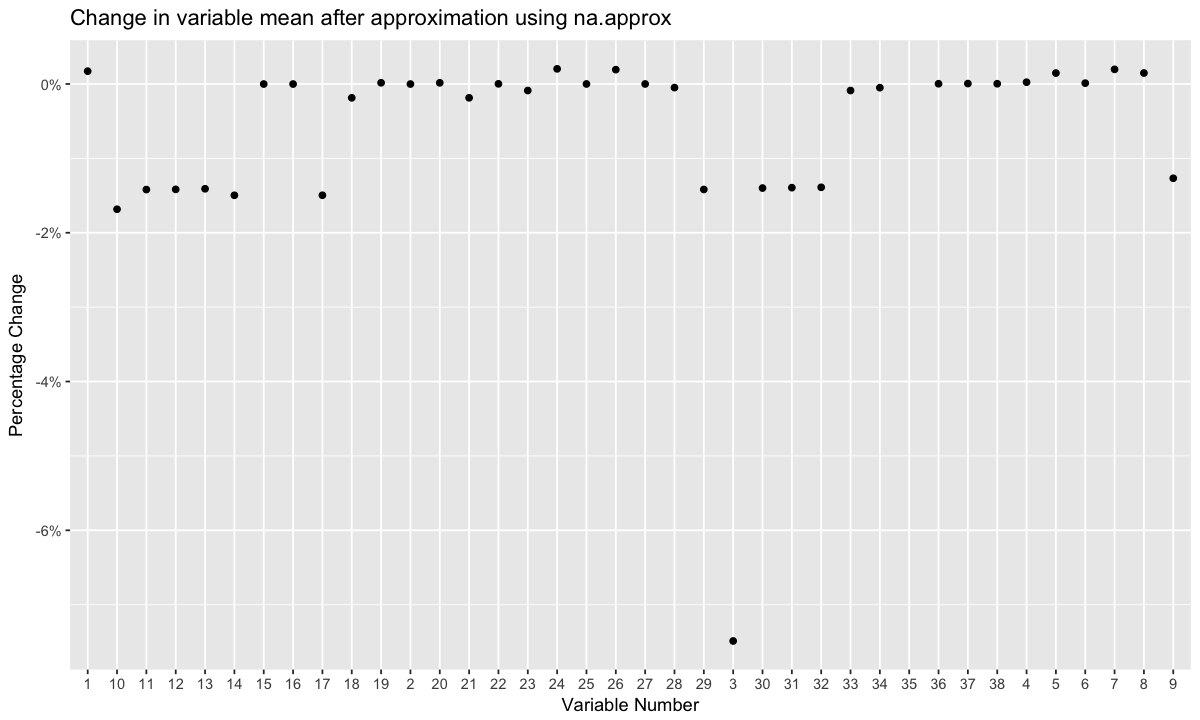

In [385]:
library(repr)
library(scales)
options(repr.plot.width=10, repr.plot.height=6)
means$variables <- rownames(means)
ggplot(means, aes(variables, change)) + geom_point() +  scale_x_discrete(breaks=c(1:38)) + scale_y_continuous(labels = percent) + ylab("Percentage Change") + xlab("Variable Number") +ggtitle("Change in variable mean after approximation using na.approx")


In [352]:
scada_err_19$Apparent_Power_Inv_AC[is.na(scada_err_19$Apparent_Power_Inv_AC)] <- 0
scada_err_19[,12] <- na.locf(scada_err_19[,12])
scada_err_19[1:174,12] <- 100
scada_err_19$Non_operational_hours[is.na(scada_err_19$Non_operational_hours)] <- 0
scada_err_19 <- subset(scada_err_19, select = -c(Current_Inv_DC, String_level_availability))

In [353]:
scada_err_19 <- data.frame(index(scada_err_19), as.data.frame(coredata(scada_err_19)))
names(scada_err_19)[1] <- "datetime"

scada_err_19$ErrorCode[is.na(scada_err_19$ErrorCode)] <- 0
scada_err_19$Modules_affected[is.na(scada_err_19$Modules_affected)] <- 0

## Feature Engineering
### Produce Rolling error count and module affected count

In [354]:
scada_err_19 <- scada_err_19 %>% group_by(inverter) %>%
  mutate(Rolling_cum_err = rollapplyr(ErrorCode, width = 12, FUN = sum, partial = TRUE)) %>% ungroup()

scada_err_19 <- scada_err_19 %>% group_by(inverter) %>%
  mutate(module_2h_cum = rollapplyr(Modules_affected, width = 8, FUN = sum, partial = TRUE)) %>% ungroup()

scada_err_19 <- scada_err_19 %>% mutate(Rolling_cum_err=lag(Rolling_cum_err))
scada_err_19 <- scada_err_19 %>% mutate(module_2h_cum=lag(module_2h_cum))

### Rolling 24 hour mean for variables that contain many NA values

In [355]:
scada_err_19 <- scada_err_19 %>% 
  arrange(inverter, datetime) %>%
  group_by(inverter) %>%
  mutate(Inv_efficiency_24h_avg = rollapply(Inv_efficiency, width = 96, FUN = mean, align = "right", partial=TRUE, na.rm=TRUE),
         Mean_array_efficiency_24h_avg = rollapply(Mean_array_efficiency, width = 96, FUN = mean, align = "right", partial=TRUE, na.rm=TRUE),
         Power_factor_Inv_AC_24h_avg = rollapply(Power_factor_Inv_AC, width = 96, FUN = mean, align = "right", partial=TRUE, na.rm=TRUE),
         Raw_PR_24h_avg = rollapply(Raw_PR, width = 96, FUN = mean, align = "right", partial=TRUE, na.rm=TRUE),
  ) %>%
  ungroup()

In [358]:
scada_err_19 <- subset(scada_err_19, select = -c(Inv_efficiency, Mean_array_efficiency, Power_factor_Inv_AC
                                                 ,Raw_PR, Reactive_Power_Inv_AC, Voltage_Inv_DC, Power_factor_Inv_AC_24h_avg))

ERROR: Error in eval(substitute(select), nl, parent.frame()): object 'Inv_efficiency' not found


In [361]:
scada_err_19 <- subset(scada_err_19, select = -c(Power_factor_Inv_AC_24h_avg))

In [362]:
scada_err_19$Raw_PR_24h_avg[is.na(scada_err_19$Raw_PR_24h_avg)] <- NA
scada_err_19$Mean_array_efficiency_24h_avg[is.na(scada_err_19$Mean_array_efficiency_24h_avg)] <- NA
scada_err_19$Inv_efficiency_24h_avg    [is.na(scada_err_19$Inv_efficiency_24h_avg)] <- NA

In [369]:
scada_err_19[1:32,47] <- mean.default(scada_err_19$Inv_efficiency_24h_avg, na.rm = TRUE)
scada_err_19[1:32,48] <- mean.default(scada_err_19$Mean_array_efficiency_24h_avg, na.rm = TRUE)
scada_err_19[1:32,49] <- mean.default(scada_err_19$Raw_PR_24h_avg, na.rm = TRUE)

scada_err_19[,47] <- na.approx(scada_err_19[47])
scada_err_19[,48] <- na.approx(scada_err_19[48])
scada_err_19[,49] <- na.approx(scada_err_19[49])

### For Error code 19, the definiton says that it is triggered if the AC power is stronger than DC power over the inverter, so produce feature to reflect this difference

In [365]:
scada_err_19$DC_AC_diff <- (scada_err_19$Power_Inv_DC - scada_err_19$Power_Inv_AC)

In [370]:
head(scada_err_19)

datetime,inverter,WS_Ambient_temperature,WS_Barometric_Pressure,WS_Precipitation,WS_Relative_Humidity,WS_Wind_Direction,WS_Wind_Speed,String_1.01.01_Module_Temperature,String_5.01.01_Module.Temperature,⋯,Voltage_L2_Inv_AC,Voltage_L3_Inv_AC,ErrorCode,Modules_affected,Rolling_cum_err,module_2h_cum,Inv_efficiency_24h_avg,Mean_array_efficiency_24h_avg,Raw_PR_24h_avg,DC_AC_diff
2016-10-12 00:00:00,1,8.733326,1010.134,0.00,93.75333,54.74001,1.006667,4.671765,5.385780,⋯,204.8186,203.8262,0,0,0,0,98.18588,15.04297,84.38761,0
2016-10-12 00:15:00,1,8.980000,1010.193,0.00,93.43333,64.85334,1.193333,4.915333,5.602647,⋯,204.5249,203.5324,0,0,0,0,98.18588,15.04297,84.38761,0
2016-10-12 00:30:00,1,9.306663,1010.180,0.00,93.00667,48.04000,1.233334,5.295467,5.902959,⋯,204.6553,203.6650,0,0,0,0,98.18588,15.04297,84.38761,0
2016-10-12 00:45:00,1,9.799999,1010.227,0.00,91.68665,39.36000,1.433334,5.735494,6.085205,⋯,204.2589,203.3245,0,0,0,0,98.18588,15.04297,84.38761,0
2016-10-12 01:00:00,1,10.059999,1010.213,0.00,91.39333,52.74000,1.913334,5.996417,6.390477,⋯,204.1311,203.1778,0,0,0,0,98.18588,15.04297,84.38761,0
2016-10-12 01:15:00,1,10.180006,1010.206,0.04,91.67335,60.63335,1.680000,6.177617,6.547928,⋯,204.2242,203.2256,0,0,0,0,98.18588,15.04297,84.38761,0


## We will now add the PCF data. This data has been accrued by Quintas Energy for String monitoring and contains some variables similar to those found in the SCADA data set

In [386]:
PCF <- read.csv("/Users/Jake/Google\ Drive/renewablesAIProject/CBM-The-hydes/PCF.csv")
PCF_cleaned <- PCF
for (i in 2:ncol(PCF_cleaned)){
  nas <- sum(is.na(PCF[,i]))
  if (nas < 6000){
    PCF_cleaned[,i] <- na.approx(PCF_cleaned[,i])
  }
}

In [387]:
names(PCF_cleaned)[1] <- "datetime"
PCF_cleaned$datetime <- as.POSIXct(PCF_cleaned$datetime,format="%d/%m/%Y%H:%M")
PCF_cleaned <- xts(PCF_cleaned[-1], PCF_cleaned$datetime)
PCF_cleaned <- PCF_cleaned["2016-10-12 00:00:00/"]
PCF_cleaned <- data.frame(index(PCF_cleaned), as.data.frame(coredata(PCF_cleaned)))
names(PCF_cleaned)[1] <- "datetime"
scada_err_19_w_pcf <- merge(x = scada_err_19, y = PCF_cleaned, by = "datetime")

In [388]:
head(scada_err_19_w_pcf)

datetime,inverter,WS_Ambient_temperature,WS_Barometric_Pressure,WS_Precipitation,WS_Relative_Humidity,WS_Wind_Direction,WS_Wind_Speed,String_1.01.01_Module_Temperature,String_5.01.01_Module.Temperature,⋯,OperativeWp,Unav_Wp_Int,Unav_Wp_Ext,Int_LosseskWh,Av1,Av2,Av3,Av4,Av5,Av6
2016-10-12,4,8.733326,1010.134,0,93.75333,54.74001,1.006667,4.671765,5.38578,⋯,0,0,0,0,0,0,0,0,0,0
2016-10-12,6,8.733326,1010.134,0,93.75333,54.74001,1.006667,4.671765,5.38578,⋯,0,0,0,0,0,0,0,0,0,0
2016-10-12,3,8.733326,1010.134,0,93.75333,54.74001,1.006667,4.671765,5.38578,⋯,0,0,0,0,0,0,0,0,0,0
2016-10-12,5,8.733326,1010.134,0,93.75333,54.74001,1.006667,4.671765,5.38578,⋯,0,0,0,0,0,0,0,0,0,0
2016-10-12,1,8.733326,1010.134,0,93.75333,54.74001,1.006667,4.671765,5.38578,⋯,0,0,0,0,0,0,0,0,0,0
2016-10-12,2,8.733326,1010.134,0,93.75333,54.74001,1.006667,4.671765,5.38578,⋯,0,0,0,0,0,0,0,0,0,0


## Dimension Reduction

**The first step of feature selection is to identify the strength of relationship, or correlation, between every pair of features. If two features always change at the same time and by related amounts, they display high correlation. Correlation can be quantified as a value between -1 and 1, where 0 means no correlation, 1 means perfect linear correlation, and -1 means the features are perfectly inversely related**

**For classification tasks, high correlation between variables is unwanted as both will contain the same information. Therefore we will eliminate variables that show high correlation with other variables**


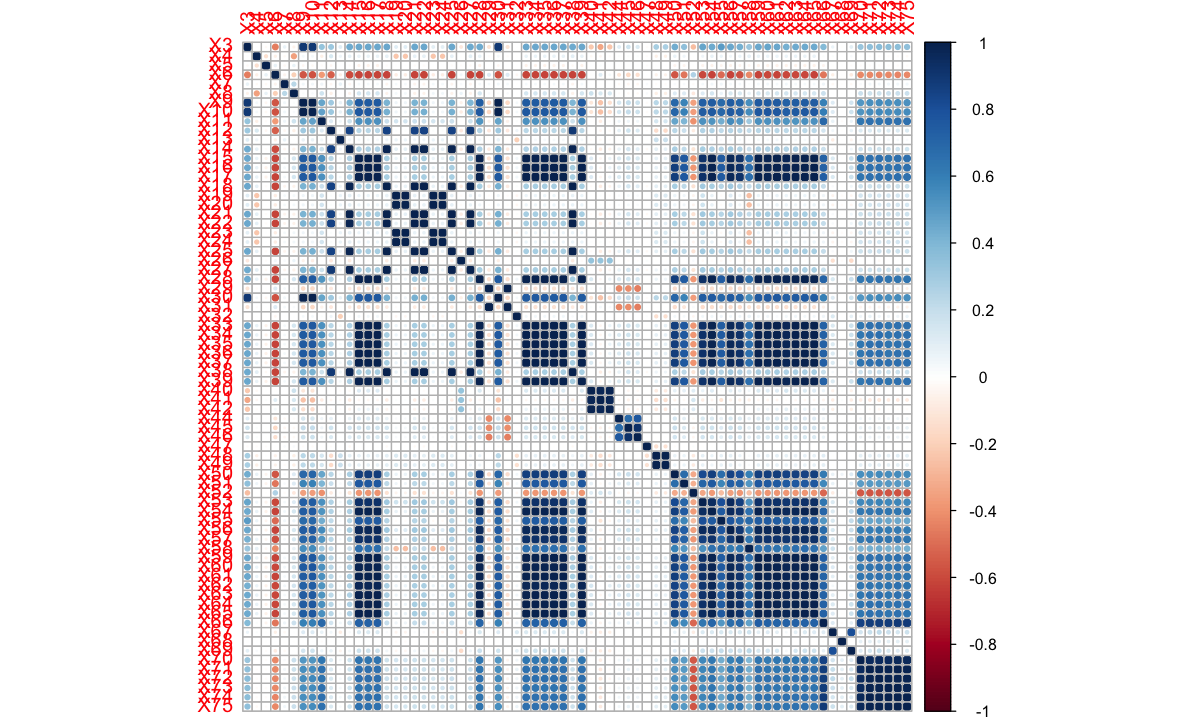

In [402]:
library(corrplot)
C <- scada_err_19_w_pcf
names(C) <- make.names(seq(ncol(C)))
cor <-cor(C[, -c(1:2, 43)])
corrplot(cor, method="circle")

**Useful but a lot of information. **

**Below we produce a list of varibales that have a stronger than 0.9 correlation**

In [394]:
cor2 <- cov2cor(cov(scada_err_19_w_pcf[, -c(1, 2,43)]))
alikes <- apply(cor2, 2, function(col) { names(Filter(function (val) { val > 0.9 }, sort.int(abs(col), decreasing=TRUE))) } )
cat(str(alikes, vec.len=10))

List of 72
 $ WS_Ambient_temperature                 : chr "WS_Ambient_temperature"
 $ WS_Barometric_Pressure                 : chr "WS_Barometric_Pressure"
 $ WS_Precipitation                       : chr "WS_Precipitation"
 $ WS_Relative_Humidity                   : chr "WS_Relative_Humidity"
 $ WS_Wind_Direction                      : chr "WS_Wind_Direction"
 $ WS_Wind_Speed                          : chr "WS_Wind_Speed"
 $ String_1.01.01_Module_Temperature      : chr [1:3] "String_1.01.01_Module_Temperature" "Module_Temperature" "String_5.01.01_Module.Temperature"
 $ String_5.01.01_Module.Temperature      : chr [1:3] "String_5.01.01_Module.Temperature" "Module_Temperature" "String_1.01.01_Module_Temperature"
 $ Apparent_Power_Inv_AC                  : chr "Apparent_Power_Inv_AC"
 $ Array_capture_losses__daily_           : chr "Array_capture_losses__daily_"
 $ Availability                           : chr "Availability"
 $ BOS_losses__daily_                     : chr [1:7] "BOS_losses

**Working through the information above, as well using the GBM summary generated abov, we can reduce these 72 features down to only 20** 


In [404]:
scada_err_19_trimmed <- subset(scada_err_19_w_pcf, select = c(datetime, inverter, WS_Ambient_temperature, 
                                                        WS_Barometric_Pressure,
                                                        WS_Relative_Humidity, 
                                                        WS_Precipitation,  
                                                        WS_Wind_Direction,   
                                                        WS_Wind_Speed,
                                                        String_5.01.01_Module.Temperature, 
                                                        Apparent_Power_Inv_AC, 
                                                        Array_capture_losses__daily_,
                                                        Availability,
                                                        Energy_Inv_DC__total_,
                                                        Irradiance_PoA,
                                                        Module_Active_Area,   
                                                        Exported_Energy_Inv_AC_Measured__total_,
                                                        Voltage_L1_Inv_AC, 
                                                        module_2h_cum,
                                                        Inv_efficiency_24h_avg,   
                                                        Mean_array_efficiency_24h_avg, 
                                                        DC_AC_diff,      
                                                        ErrorCode,
                                                        OperativeWp,
                                                        Unav_Wp_Int,
                                                        Unav_Wp_Ext,
                                                        Int_LosseskWh,
                                                        Av1
                                                        ))

In [412]:
library(entropy)
H.x <- entropy(table(scada_err_19_trimmed$ErrorCode))
mi <- apply(scada_err_19_trimmed[, -c(1:2,22)], 2, function(col) { H.x + entropy(table(col)) - entropy(table(scada_err_19_trimmed$ErrorCode, col))})
sort(mi, decreasing=TRUE)

Mean_array_efficiency_24h_avg                  Inv_efficiency_24h_avg 
                           1.676026e-02                            1.671022e-02 
                  Apparent_Power_Inv_AC                           module_2h_cum 
                           1.468851e-02                            1.349401e-02 
           Array_capture_losses__daily_                   Energy_Inv_DC__total_ 
                           1.236595e-02                            1.236595e-02 
                         Irradiance_PoA Exported_Energy_Inv_AC_Measured__total_ 
                           1.236595e-02                            1.236595e-02 
                             DC_AC_diff       String_5.01.01_Module.Temperature 
                           1.236595e-02                            1.236382e-02 
                      WS_Wind_Direction                       Voltage_L1_Inv_AC 
                           1.228621e-02                            1.228620e-02 
                 WS_Ambient_temperature                    WS_Relative_Humidity 
                           1.220088e-02                            1.215589e-02 
                 WS_Barometric_Pressure                           WS_Wind_Speed 
                           1.097642e-02                            9.124378e-03 
                     Module_Active_Area                             OperativeWp 
                           5.267974e-03                            2.539033e-03 
                                    Av1                           Int_LosseskWh 
                           2.110944e-03                            2.571594e-04 
                       WS_Precipitation                             Unav_Wp_Int 
                           1.763643e-04                            1.164693e-04 
                           Availability                             Unav_Wp_Ext 
                           3.620491e-06                            7.854226e-07

In [418]:
#Evaluation Function
Evaluate <- function(actual=NULL, predicted=NULL, cm=NULL){
    if(is.null(cm)) {
        actual = actual[!is.na(actual)]
        predicted = predicted[!is.na(predicted)]
        f = factor(union(unique(actual), unique(predicted)))
        actual = factor(actual, levels = levels(f))
        predicted = factor(predicted, levels = levels(f))
        cm = as.matrix(table(Actual=actual, Predicted=predicted))
    }
    
    n = sum(cm) # number of instances
    nc = nrow(cm) # number of classes
    diag = diag(cm) # number of correctly classified instances per class 
    rowsums = apply(cm, 1, sum) # number of instances per class
    colsums = apply(cm, 2, sum) # number of predictions per class
    p = rowsums / n # distribution of instances over the classes
    q = colsums / n # distribution of instances over the predicted classes
    
    #accuracy
    accuracy = sum(diag) / n
    
    #per class
    recall = diag / rowsums
    precision = diag / colsums
    f1 = 2 * precision * recall / (precision + recall)
    
    #macro
    macroPrecision = mean(precision)
    macroRecall = mean(recall)
    macroF1 = mean(f1)
    
    #1-vs-all matrix
    oneVsAll = lapply(1 : nc,
                      function(i){
                          v = c(cm[i,i],
                                rowsums[i] - cm[i,i],
                                colsums[i] - cm[i,i],
                                n-rowsums[i] - colsums[i] + cm[i,i]);
                          return(matrix(v, nrow = 2, byrow = T))})
    
    s = matrix(0, nrow=2, ncol=2)
    for(i in 1:nc){s=s+oneVsAll[[i]]}
    
    #avg accuracy
    avgAccuracy = sum(diag(s))/sum(s)
    
    #micro
    microPrf = (diag(s) / apply(s,1, sum))[1];
    
    #majority class
    mcIndex = which(rowsums==max(rowsums))[1] # majority-class index
    mcAccuracy = as.numeric(p[mcIndex]) 
    mcRecall = 0*p;  mcRecall[mcIndex] = 1
    mcPrecision = 0*p; mcPrecision[mcIndex] = p[mcIndex]
    mcF1 = 0*p; mcF1[mcIndex] = 2 * mcPrecision[mcIndex] / (mcPrecision[mcIndex] + 1)
    
    #random accuracy
    expAccuracy = sum(p*q)
    #kappa
    kappa = (accuracy - expAccuracy) / (1 - expAccuracy)
    
    #random guess
    rgAccuracy = 1 / nc
    rgPrecision = p
    rgRecall = 0*p + 1 / nc
    rgF1 = 2 * p / (nc * p + 1)
    
    #rnd weighted
    rwgAccurcy = sum(p^2)
    rwgPrecision = p
    rwgRecall = p
    rwgF1 = p
    
    classNames = names(diag)
    if(is.null(classNames)) classNames = paste("C",(1:nc),sep="")
    
    return(list(
        ConfusionMatrix = cm,
        Metrics = data.frame(
            Class = classNames,
            Accuracy = accuracy,
            Precision = precision,
            Recall = recall,
            F1 = f1,
            MacroAvgPrecision = macroPrecision,
            MacroAvgRecall = macroRecall,
            MacroAvgF1 = macroF1,
            AvgAccuracy = avgAccuracy,
            MicroAvgPrecision = microPrf,
            MicroAvgRecall = microPrf,
            MicroAvgF1 = microPrf,
            MajorityClassAccuracy = mcAccuracy,
            MajorityClassPrecision = mcPrecision,
            MajorityClassRecall = mcRecall,
            MajorityClassF1 = mcF1,
            Kappa = kappa,
            RandomGuessAccuracy = rgAccuracy,
            RandomGuessPrecision = rgPrecision,
            RandomGuessRecall = rgRecall,
            RandomGuessF1 = rgF1,
            RandomWeightedGuessAccurcy = rwgAccurcy,
            RandomWeightedGuessPrecision = rwgPrecision,
            RandomWeightedGuessRecall= rwgRecall,
            RandomWeightedGuessWeightedF1 = rwgF1)))
}


In [425]:
library(caret)
library(gbm)
TrainingDataIndex <- createDataPartition(scada_err_19_trimmed$ErrorCode, p=0.75, list = FALSE)
trainingData <- scada_err_19_trimmed[TrainingDataIndex,]
testingData <- scada_err_19_trimmed[-TrainingDataIndex,]
sorted <- names(sort(mi, decreasing=TRUE))
recalls <- vector()
#Leave the for loop as it is because it's a little shit that decides to crash for no apparent reason at random intervals if
#changed. 
for (i in 2:length(sorted))
{
  form <- paste0("ErrorCode ~ ", Reduce(function (r, name) { paste(r, paste0("", name), sep=" + ") }, sorted[1:i]))
  gbm_model <- gbm(formula = as.formula(form), data = trainingData,   
                    distribution = "multinomial", n.trees = 50,
                    interaction.depth = 5, shrinkage = 0.1)
  pred_gbm <- as.data.frame(predict(gbm_model, testingData, n.trees = 50,type = "response"))
  names(pred_gbm) <- gsub(".50", "", names(pred_gbm))
  pred_gbm$ErrorCode <- as.factor(colnames(pred_gbm)[max.col(pred_gbm)])
  eval <- Evaluate(actual=testingData$ErrorCode, predicted=pred_gbm$ErrorCode)
  recalls <- c(recalls, t(eval$Metrics)[4,2])
  print(t(eval$Metrics)[4,2])
}

plot(accuracies, xlab="Number of features", ylab="Accuracy")

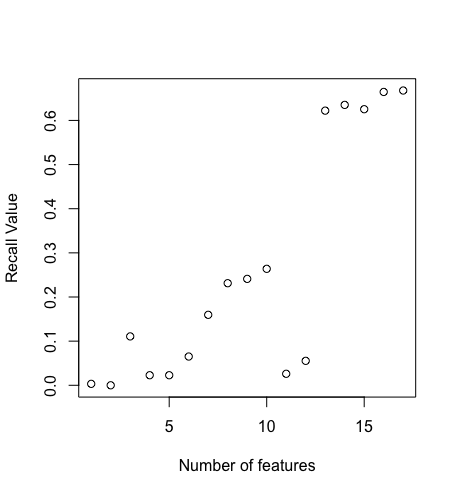